## Problem Statement:
    
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal:
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# !pip install category_encoders

In [2]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import category_encoders as ce

/Users/shivaniagrawal/Library/Python/3.8/lib/python/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Data Understanding, Preparation and EDA

In [3]:
# Loading data from csv
house_data = pd.read_csv("train.csv")
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [4]:
# columns 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [5]:
#dataframe shape
house_data.shape

(1460, 81)

In [6]:
# dataframe model description
house_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
house_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [9]:
# count of unique values of FireplaceQu 
house_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [10]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
#Dropping columns because more than 90% values are missing
house_data=house_data.drop(columns=['Alley'])
house_data=house_data.drop(columns=['PoolQC'])
house_data=house_data.drop(columns=['Fence'])
house_data=house_data.drop(columns=['MiscFeature'])

In [12]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

### Handling missing values

In [13]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [14]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [15]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [16]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [17]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())

In [18]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('NA')

In [19]:
#replace Nan values of BsmtQual with NA i.e. No Basement Quality
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [20]:
#replace Nan values of BsmtCond with NA i.e. No Basement Condition
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [21]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('NA')

In [22]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement Fintype 1
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [23]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [24]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0]) 

In [25]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [26]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [27]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [28]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [29]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [30]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [31]:
house_data_org=house_data.copy(deep=True)

## Understanding certain categorical variables

In [32]:
qualitative = [f for f in house_data_org.columns if house_data_org.dtypes[f] == 'object']

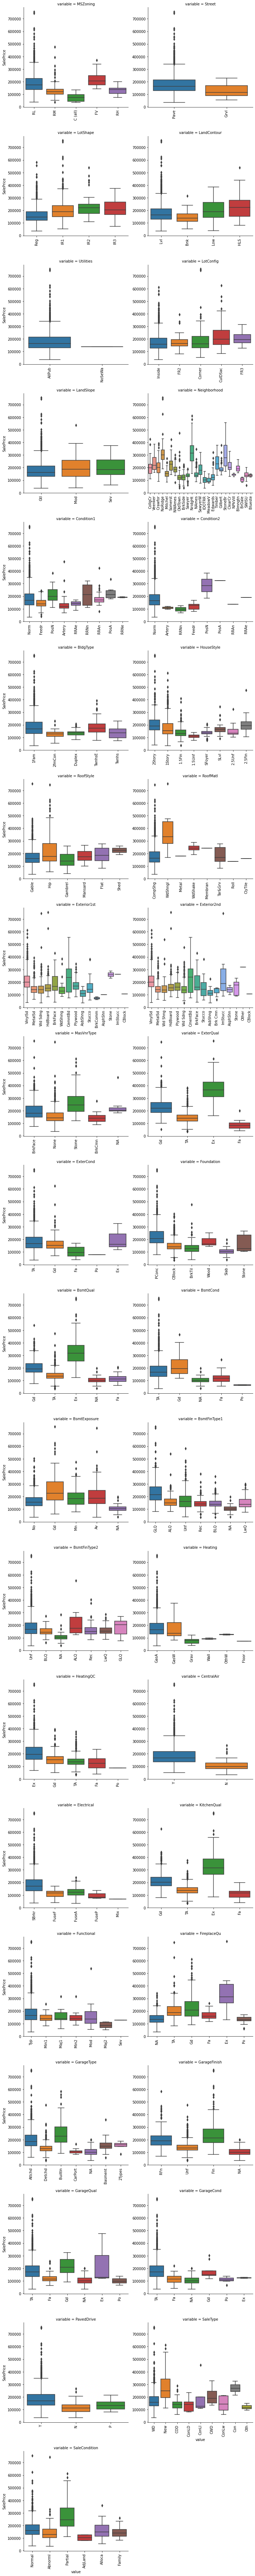

In [33]:
for c in qualitative:
    house_data_org[c] = house_data_org[c].astype('category')
    if house_data_org[c].isnull().any():
        house_data_org[c] = house_data_org[c].cat.add_categories(['MISSING'])
        house_data_org[c] = house_data_org[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(house_data_org, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

Most of these variables have a diverse relationship with the 'Sales' and we will try to define some of them below -


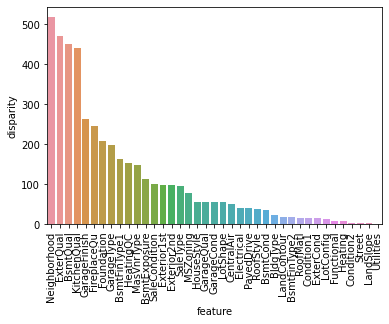

In [34]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(house_data_org)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

From the above chart we can see that some of the majority influencing variables are -

- Neighbourhood
- ExterQuality
- Basement Quality
- KitchenQuality


# Feature Engineering

## Handling categorical variables with less CATEGORIES

In [35]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [36]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [37]:
#convert MSSubClass into object type as the numbers are representative of its categories
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [38]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [39]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [40]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [41]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [42]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [43]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [44]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [45]:
house_data.head(5)

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual ExterCond Foundation  BsmtQual BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold SaleType SaleCondition  SalePrice  HouseAge
0   1         60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0          4        TA      PConc         4       TA             1             6         706          Unf           0        150          856    GasA          5          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1            4             8        Typ           0            0     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0        0       2       WD        Normal     208500         5
1   2         20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0          3        TA     CBlock         4       TA             4             5         978          Unf           0        284         1262    GasA          5          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1            3             6        Typ           1            3     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0        0       5       WD        Normal     181500        31
2   3         60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0          4        TA      PConc         4       TA             2             6         486          Unf           0        434          920    GasA          5          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1            4             6        Typ           1            3     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0        0       9       WD        Normal     223500         7
3   4         70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0          3        TA     BrkTil         3       Gd             1             5         216          Unf           0        540          756    GasA          4          Y      SBrkr       961       756             0       1717             1             0         1         0             3     

## Drop columns that do not add much variance

In [46]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [47]:
#Drop columns which have more than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [48]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


## Create Dummy Varibales for categorical variables with more categories


In [49]:
# # shortcut for creating dummies for all categorical variables
# housing_categorical = house_data.select_dtypes(include=['category'])
# print(housing_categorical.head())
# housing_dummies = pd.get_dummies(housing_categorical)
# print(housing_dummies.head())
# # Dropping all categorical variables
# housing_1 = house_data.drop(list(housing_categorical.columns),axis=1)
# print(housing_1.head())
# # concat dummy variables with housing dataset
# housing_1 = pd.concat([housing_1, housing_dummies], axis=1)
# print(housing_1.head())

In [50]:
# create dummy variable for MSSubClass
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
print(MSSubClass_df.head(5))
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190
0              0              0              0              0              1              0              0              0              0              0               0               0               0               0
1              0              0              0              0              0              0              0              0              0              0               0               0               0               0
2              0              0              0              0              1              0              0              0              0              0               0               0               0               0
3              0              0              0              0              0              1              0              0              0

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0
3         70       RL         60.0     9550      IR1    Corner      Crawfor     2Story            7            5          1970     Gable     Wd Sdng     Wd Shng       None         0.0          3     BrkTil         3             1             5         216           0        540          756          4       961       756             0       1717             1             0         1         0             3             1            4             7           1            4     Detchd       1998.0          Unf           3         642           0  

In [51]:
#create dummy variable for MSZoning
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
print(MSZoning_df.head())
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0            0            0            1            0
1            0            0            1            0
2            0            0            1            0
3            0            0            1            0
4            0            0            1            0


MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0
3         70       RL         60.0     9550      IR1    Corner      Crawfor     2Story            7            5          1970     Gable     Wd Sdng     Wd Shng       None         0.0          3     BrkTil         3             1             5         216           0        540          756          4       961       756             0      

In [52]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')
print(LotShape_df)
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

      LotShape_IR2  LotShape_IR3  LotShape_Reg
0                0             0             1
1                0             0             1
2                0             0             0
3                0             0             0
4                0             0             0
...            ...           ...           ...
1455             0             0             1
1456             0             0             1
1457             0             0             1
1458             0             0             1
1459             0             0             1

[1460 rows x 3 columns]


MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0
3         70       RL         60.0     9550      IR1    Corner      Crawfor     2Story            7            5          1970     Gable     Wd Sdng     Wd Shng       None   

In [53]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [54]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [55]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [56]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [57]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [58]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [59]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [60]:
#create dummy variable for ExterQual
ExterQual_df = pd.get_dummies(house_data['ExterQual'],drop_first=True, prefix='ExterQual')
#concat ExterQual_df with main house_data df
house_data = pd.concat([house_data,ExterQual_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [61]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [62]:
#create dummy variable for BsmtQual
BsmtQual_df = pd.get_dummies(house_data['BsmtQual'],drop_first=True, prefix='BsmtQual')
#concat BsmtQual_df with main house_data df
house_data = pd.concat([house_data,BsmtQual_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [63]:
#create dummy variable for BsmtExposure
BsmtExposure_df = pd.get_dummies(house_data['BsmtExposure'],drop_first=True, prefix='BsmtExposure')
#concat BsmtExposure_df with main house_data df
house_data = pd.concat([house_data,BsmtExposure_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [64]:
#create dummy variable for BsmtFinType1
BsmtFinType1_df = pd.get_dummies(house_data['BsmtFinType1'],drop_first=True, prefix='BsmtFinType1')
#concat BsmtFinType1_df with main house_data df
house_data = pd.concat([house_data,BsmtFinType1_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [65]:
#create dummy variable for HeatingQC
HeatingQC_df = pd.get_dummies(house_data['HeatingQC'],drop_first=True, prefix='HeatingQC')
#concat HeatingQC_df with main house_data df
house_data = pd.concat([house_data,HeatingQC_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [66]:
#create dummy variable for KitchenQual
KitchenQual_df = pd.get_dummies(house_data['KitchenQual'],drop_first=True, prefix='KitchenQual')
#concat KitchenQual_df with main house_data df
house_data = pd.concat([house_data,KitchenQual_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [67]:
#create dummy variable for FireplaceQu
FireplaceQu_df = pd.get_dummies(house_data['FireplaceQu'],drop_first=True, prefix='FireplaceQu')
#concat FireplaceQu_df with main house_data df
house_data = pd.concat([house_data,FireplaceQu_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [68]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [69]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0   
3         70       RL     

In [70]:
house_data.shape

(1460, 192)

In [71]:
#Drop categorical variables after ceating dummy varaibles
dummy_vars=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'Foundation','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','FireplaceQu',
                                    'GarageType', 'GarageFinish']
house_data=house_data.drop(columns=dummy_vars)

In [72]:
house_data.shape

(1460, 172)

In [73]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 172 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(32), uint8(137)
memory usage: 594.7 KB


In [74]:
house_data.head(5)

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0         65.0     8450            7            5          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0                 1                     0                    0                     0                     0                     1                     0                     0                     0                    0   
1         80.0     9600            6            8          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0                 0                     0                    0                     0                     0                     0                     0                     0                     0                    0   
2         68.0    11250            7            5          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0                 1                     0                    0                     0                     0                     1                     0                     0                     0                    0   
3         60.0     9550    

## Performing EDA with original housing data

<AxesSubplot:>

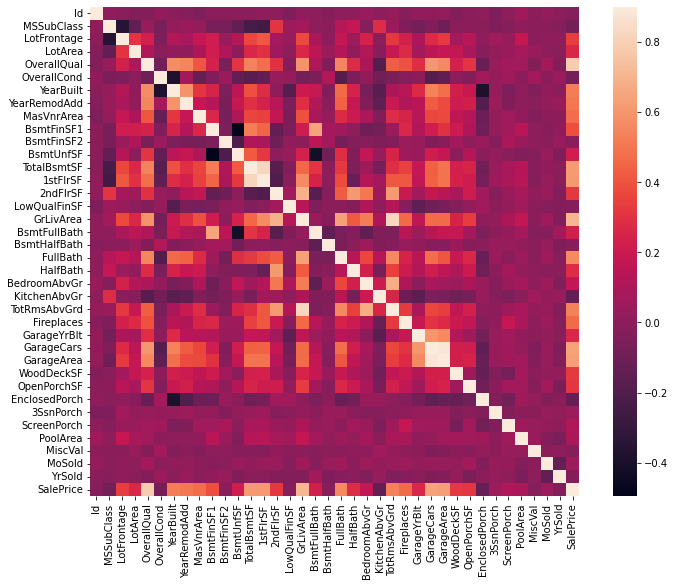

In [75]:
#Correlation map to see how features are correlated with SalePrice
corrmat = house_data_org.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

From the pairplot given above we can see that some of the numerical colums are highly related with the sales price
- LotFrontage
- Overall Quality
- Year Built
- Year removeadd
- MasVnrArea
- TotalBsmn SF
- 1st Foor SF
- Gr ving Area
- Fullbath
- Fireplaces
- Garage Area

We will be keeping them in our consideration while building our model
Let us also check what are the most corelated values present in the data from the ~80 odd variables

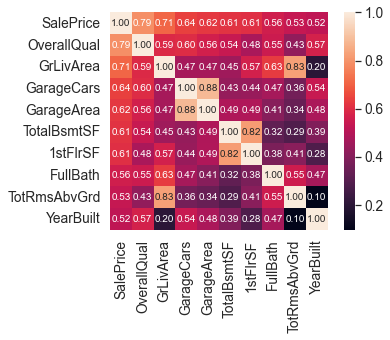

In [76]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_data_org[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can see from the above chart that the top 10 variables are similar to what we had initially deciphered
- OverallQual - It is obvious that having a good quality house would fetch bigger price
- Grlivarea - More the area of the floor above the ground floor, greater is the price
- Garage cars, garage area, total basement SF, 1st floor SF -Seems to make sense

Let us plot the graphs between some of these important numerical variables and see if we see any pattern

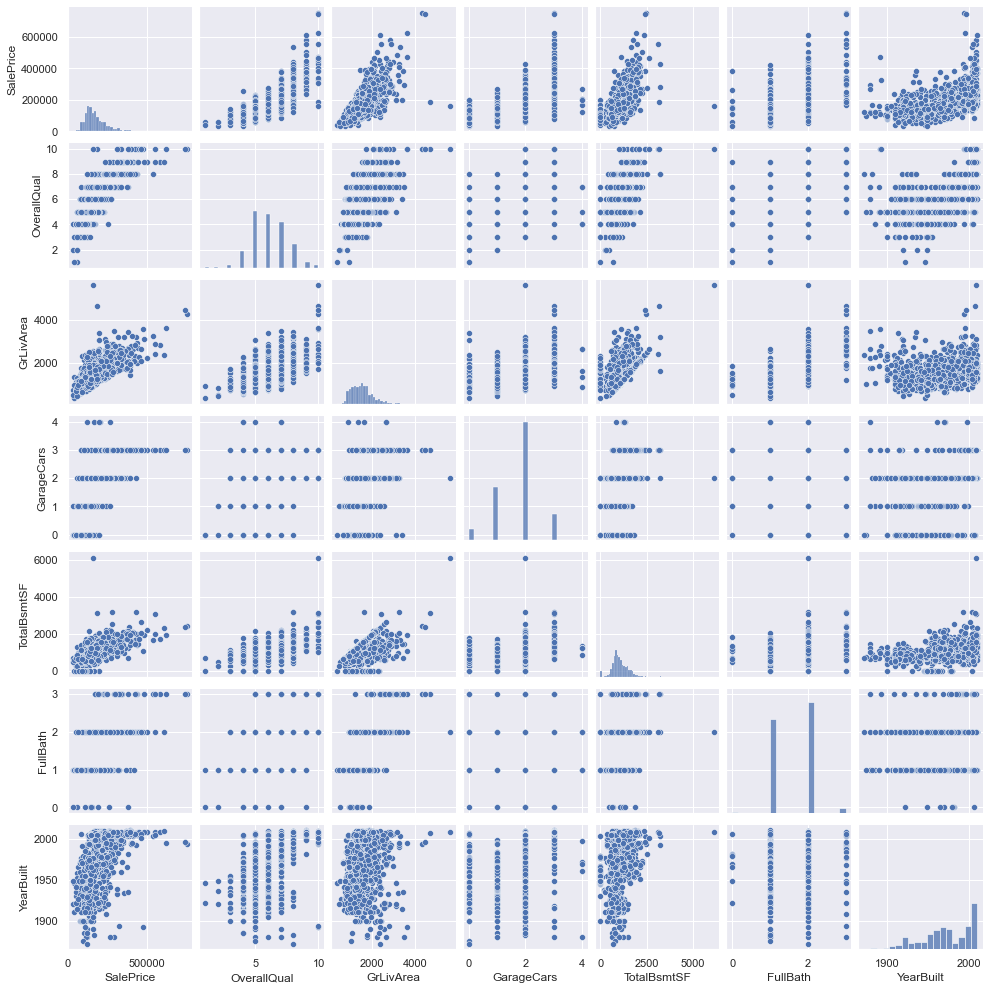

In [77]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_data_org[cols],height = 2)
plt.show()

In [78]:
house_data.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'FireplaceQu_5', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=172)

# Model Building and Evaluation

## Splitting into train test

In [79]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 172)
(439, 172)


In [80]:
print(type(df_train))
print(type(df_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [81]:
df_train.describe()

LotFrontage        LotArea  OverallQual  OverallCond  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold      SalePrice     HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
count  1021.000000    1021.000000  1021.000000  1021.000000   1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000  1021.000000   1021.000000   1021.000000  1021.000000  1021.000000   1021.000000   1021.000000   1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000    1021.000000  1021.000000  1021.000000  1021.000000   1021.000000  1021.000000    1021.000000  1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000     1021.000000     1021.000000     1021.000000     1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   1021.000000   1021.000000        1021.000000    1021.000000    1021.000000       1021.000000           1021.000000          1021.000000           1021.000000           1021.000000           1021.000000           1021.000000   
mean     69.569050   10489.964740     6.093046     5.580803   1984.984329   104.489716   448.165524    50.087169   563.745348  1061.998041  1168.611166   343.540646      5.999021  1518.150833      0.439765      0.059745     1.567091     0.377081      2.856024      1.053869      6.504407     0.598433  1868.316357     1.771792   471.995103    92.641528    47.035260      23.241920     3.940255    14.047013     2.149853     48.711068     6.288932  180609.596474    36.497551       0.041136       0.002938       0.010774       0.100881       0.196866       0.041136       0.009794       0.042116       0.014691       0.041136        0.064643        0.045054        0.005877        0.024486     0.044074     0.012733     0.785504     0.150833      0.030362      0.008815      0.633692           0.064643       0.030362       0.002938          0.710088              0.000979             0.011753              0.038198              0.019589              0.098923              0.031342   
std      22.090553   10308.062725     1.399636     1.092121     20.604962   187.341089   465.115135   170.847470   448.739203   459.098042   397.896911   435.498994     48.207914   531.849898      0.525381      0.241230     0.551872     0.500807      0.819993      0.230169      1.605514     0.645769   455.160037     0.746119   212.213075   124.479090    66.195468      63.167621    32.333667    51.081766    34.524133    578.364428     2.748576   79099.444132    30.346064       0.198702       0.054153       0.103287       0.301319       0.397825       0.198702       0.098529       0.200951       0.120374       0.198702        0.246014        0.207524        0.076471        0.154627     0.205361     0.112173     0.410673     0.358061      0.171666      0.093519      0.482031           0.246014       0.171666       0.054153          0.453944              0.031296             0.107826              0.191768              0.138650              0.298704              0.174325   
min      21.000000    1477.000000     1.000000     1.000000   1950.0000

## Scaling The Numerical Features

In [82]:
house_data.dtypes.value_counts()

uint8      137
int64       32
float64      3
dtype: int64

In [83]:
df_train.dtypes.value_counts()

uint8      137
int64       32
float64      3
dtype: int64

In [84]:
df_train.shape

(1021, 172)

In [85]:
df_test.shape

(439, 172)

In [86]:
print(type(df_train))
print(type(df_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [87]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = list(set(house_data.columns))# - set(dummy_vars))

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
318      0.925326 -0.057261     0.648310    -0.532073      0.389207    0.809137    1.159065   -0.293313  -0.454262     0.621091  0.511410  2.137583     -0.124502   2.121655      1.066863     -0.247791  0.784821  1.244440      1.395790     -0.234155      1.555150    0.622148     0.274068    1.646935    0.867501    1.988123     0.195951       1.912645  -0.121922    -0.275126 -0.062302 -0.084263 -0.833178   1.004170 -0.675791      -0.207125      -0.054286       -0.10436      -0.334963       2.019802      -0.207125      -0.099454      -0.209684      -0.122109      -0.207125       -0.262888       -0.217208       -0.076885       -0.158431    -0.214724    -0.113564     0.522558    -0.421455     -0.176955     -0.094304      0.760298          -0.262888      -0.176955      -0.054286          0.638965             -0.031311            -0.109055             -0.199286             -0.141351             -0.331335             -0.179878             -0.283590             -0.233992            -0.170979   
239     -0.795709 -0.169753    -0.066511    -1.448170     -1.698692   -0.558025   -0.761831   -0.293313   0.172244    -0.712611 -0.931882  0.793638     -0.124502  -0.058599     -0.837450     -0.247791 -1.028080  1.244440      0.175669     -0.234155      0.308833    0.622148     0.177351   -1.034916   -1.188045   -0.744598     1.405086      -0.368121  -0.121922    -0.275126 -0.062302 -0.084263 -0.833178  -0.855161  0.939707      -0.207125      -0.054286       -0.10436       2.985401      -0.495098      -0.207125      -0.099454      -0.209684      -0.122109      -0.207125       -0.262888       -0.217208       -0.076885       -0.158431    -0.214724    -0.113564     0.522558    -0.421455     -0.176955     -0.094304      0.760298          -0.262888      -0.176955      -0.054286          0.638965             -0.031311            -0.109055             -0.199286             -0.141351             -0.331335             -0.179878              3.526218             -0.233992            -0.170979   
986     -0.478677 -0.502762    -0.066511     2.216221      0.874765   -0.558025   -0.964030   -0.293313  -0.175567    -1.257424 -0.421449  0.667284     -0.124502   0.219811     -0.837450     -0.247791 -1.028080 -0.753316     -1.044452     -0.234155     -0.937484   -0.927153     0.179549   -1.034916   -1.023035    2.422143    -0.710899      -0.368121  -0.121922    -0.275126 -0.062302 -0.084263 -0.105172  -0.804567  1.961757      -0.207125      -0.054286       -0.10436       2.985401      -0.495098      -0.207125      -0.099454      -0.209684      -0.122109      -0.207125       -0.262888       -0.217208       -0.076885       -0.158431    -0.214724    -0.113564    -1.913662     2.372735     -0.176955     -0.094304      0.760298          -0.262888      -0.176955      -0.054286         -1.565032             -0.031311            -0.109055             -0.199286             -0.141351             -0.331335             -0.179878             -0.283590             -0.233992            -0.170979   
14

In [88]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [89]:
df_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea   MiscVal    MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
1436    -0.433386 -0.144614    -1.496155     0.384025     -0.679020   -0.558025    0.361022   -0.293313  -0.703973    -0.431488 -0.765928 -0.789230     -0.124502  -1.230557     -0.837450     -0.247791 -1.028080 -0.753316      0.175669     -0.234155     -0.937484   -0.927153     0.232304    0.306009    0.264038   -0.744598    -0.710899      -0.368121  -0.121922    -0.275126  -0.062302 -0.084263 -0.469175  -0.760297 -0.016404      -0.207125      -0.054286       -0.10436      -0.334963      -0.495098      -0.207125      -0.099454      -0.209684      -0.122109      -0.207125       -0.262888       -0.217208       -0.076885       -0.158431    -0.214724    -0.113564     0.522558    -0.421455     -0.176955     -0.094304      0.760298          -0.262888       5.651149      -0.054286         -1.565032             -0.031311            -0.109055             -0.199286             -0.141351             -0.331335             -0.179878              -0.28359             -0.233992   
57       0.880036  0.112107     0.648310    -0.532073      0.923321   -0.558025   -0.964030   -0.293313   0.660517    -0.440205 -0.775986  1.186484     -0.124502   0.379709     -0.837450     -0.247791  0.784821  1.244440      0.175669     -0.234155      0.308833   -0.927153     0.298247    0.306009    0.438477   -0.744598     0.347093      -0.368121  -0.121922    -0.275126  -0.062302 -0.084263  0.622834   0.200990 -1.137362      -0.207125      -0.054286       -0.10436      -0.334963       2.019802      -0.207125      -0.099454      -0.209684      -0.122109      -0.207125       -0.262888       -0.217208       -0.076885       -0.158431    -0.214724    -0.113564     0.522558    -0.421455     -0.176955     -0.094304     -1.315274          -0.262888      -0.176955      -0.054286         -1.565032             -0.031311            -0.109055             -0.199286             -0.141351              3.018097             -0.179878              -0.28359             -0.233992   
780     -0.297515 -0.253806     0.648310    -0.532073      0.534875   -0.355087   -0.964030   -0.293313   1.501060     0.381373  0.212191 -0.789230     -0.124502  -0.498789     -0.837450     -0.247791  0.784821 -0.753316      0.175669     -0.234155     -0.314326    0.622148     0.278464    0.306009   -0.329996    1.023633    -0.393502      -0.368121  -0.121922    -0.275126  -0.062302 -0.084263 -0.105172  -0.058305 -0.807668      -0.207125      -0.054286       -0.10436      -0.334963      -0.495098      -0.207125      -0.099454      -0.209684      -0.122109      -0.207125       -0.262888       -0.217208       -0.076885       -0.158431    -0.214724    -0.113564     0.522558    -0.421455     -0.176955     -0.094304      0.760298          -0.262888      -0.176955      -0.054286          0.638965             -0.031311            -0.109055             -0.199286             -0.141351             -0.331335             -0.179878              -0.28359              4.273658   
382      0.427132 -0.120835     0.648310    -0.532073      1.020432   -0.558025   

In [90]:
type(df_test)

pandas.core.frame.DataFrame

In [91]:
df_train.shape

(1021, 172)

In [92]:
df_test.shape

(439, 172)

In [93]:
df_train.describe()

LotFrontage       LotArea   OverallQual   OverallCond  YearRemodAdd    MasVnrArea    BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF     1stFlrSF      2ndFlrSF  LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd    Fireplaces   GarageYrBlt    GarageCars    GarageArea    WoodDeckSF   OpenPorchSF  EnclosedPorch     3SsnPorch   ScreenPorch     PoolArea       MiscVal        MoSold     SalePrice      HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190   MSZoning_FV   MSZoning_RH   MSZoning_RL   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1021.000000  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   1.021000e+03  1.021000e+03  1.021000e+03  1021.000000  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   1.021000e+03   1.021000e+03   1.021000e+03   1.021000e+03   1.021000e+03   1.021000e+03   1.021000e+03   1.021000e+03   1.021000e+03   1.021000e+03    1.021000e+03    1.021000e+03     1021.000000    1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03       1.021000e+03   1.021000e+03   1.021000e+03      1.021000e+03          1.021000e+03          1021.000000          1.021000e+03          1.021000e+03          1.021000e+03   
mean  -1.043892e-17 -7.655211e-17 -2.696722e-16  1.539741e-16 -8.420732e-16 -6.611318e-17 -6.437336e-17 -1.870307e-17 -1.304865e-17  1.879006e-16     0.000000 -6.350345e-17 -1.130883e-17 -5.915390e-17  4.871498e-17 -5.219462e-18  6.611318e-17  4.784507e-17 -3.479641e-18  3.862402e-16 -2.392253e-16  9.395031e-17  2.296563e-16  7.481229e-17 -9.569013e-17 -4.523534e-17 -7.133264e-17   5.306453e-17 -2.087785e-17 -3.479641e-18     0.000000 -1.391856e-17  5.567426e-17  1.278768e-16 -9.742995e-17   1.252671e-16  -2.783713e-17  -3.479641e-17  -2.174776e-18  -3.131677e-17   8.699103e-17  -3.044686e-17  -8.525121e-17  -2.783713e-17   8.873085e-17   -1.043892e-17    4.871498e-17        0.000000    6.959282e-18  2.609731e-17 -4.523534e-17 -6.959282e-18  5.567426e-17 -1.391856e-17 -3.131677e-17 -7.829193e-18      -2.435749e-17  -5.219462e-18  -3.827605e-17      6.698309e-17         -1.043892e-17             0.000000          1.565839e-17          5.219462e-17          2.261767e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00     1.000490  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   1.000490e+00  1.000490e+00  1.000490e+00     1.000490  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   1.000490e+00   1.000490e+00   1.000490e+00   1.000490e+00   1.000490e+00   1.000490e+00   1.000490e+00   1.000490e+00   1.000490e+00   1.000490e+00    1.000490e+00    1.000490e+00        1.000490    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00       1.000490e+00   1.000490e+00   1.000490e+00      1.000490e+00          1.000490e+00             1.000490          1.000490e+00          1.000490e+00          1.000490e+00   
min   -2.199712e+00 -8.747892e-01 -3.640619e+00 -4.196464e+00 -1

In [94]:
type(df_train)

pandas.core.frame.DataFrame

In [95]:
type(df_test)

pandas.core.frame.DataFrame

In [96]:
y_train = pd.DataFrame(df_train.pop('SalePrice'))
X_train = df_train
print('SalePrice' in list(X_train.columns))

False


In [97]:
y_train

SalePrice
318    1.004170
239   -0.855161
986   -0.804567
1416  -0.735000
390   -0.779270
...         ...
802    0.106126
53     2.585234
350    1.738555
79    -0.893106
792    1.127999

[1021 rows x 1 columns]

## RFE- Recursive Feature Elimination

In [98]:
# Take Top 35 Features from RFE
# Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)

In [99]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 6),
 ('LotArea', False, 5),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', False, 46),
 ('MasVnrArea', False, 41),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 20),
 ('BsmtHalfBath', False, 64),
 ('FullBath', False, 9),
 ('HalfBath', False, 73),
 ('BedroomAbvGr', False, 61),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 60),
 ('Fireplaces', False, 33),
 ('GarageYrBlt', False, 82),
 ('GarageCars', True, 1),
 ('GarageArea', False, 88),
 ('WoodDeckSF', False, 57),
 ('OpenPorchSF', False, 109),
 ('EnclosedPorch', False, 95),
 ('3SsnPorch', False, 59),
 ('ScreenPorch', False, 62),
 ('PoolArea', False, 93),
 ('MiscVal', False, 127),
 ('MoSold', False, 122),
 ('HouseAge', False, 103),
 ('MSSubClass_30', False, 71),
 ('MSSubClass_40', False, 116),
 ('MSSubC

In [100]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars', 'Neighborhood_NoRidge', 'HouseStyle_1Story', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_2', 'BsmtQual_3', 'BsmtQual_4', 'BsmtQual_5', 'BsmtExposure_4', 'BsmtFinType1_1', 'BsmtFinType1_2', 'BsmtFinType1_3', 'BsmtFinType1_4', 'BsmtFinType1_5', 'BsmtFinType1_6', 'KitchenQual_5', 'GarageType_NA', 'GarageFinish_NA'], dtype='object')

In [101]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       ...
       'FireplaceQu_3', 'FireplaceQu_4', 'FireplaceQu_5', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=136)

### Modelling using statsmodel to understand statistics

In [102]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [103]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [104]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [105]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:00   Log-Likelihood:                -518.83
No. Observations:                1021   AIC:                             1096.
Df Residuals:                     992   BIC:                             1239.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.153e-16      0.013  -2.47e-14      1.000      -0.025       0.025
OverallQual              0.2560      0.023     11.049      0.000       0.211       0.301
OverallCond              0.0720      0.014      4.985      0.000       0.044       0.100
BsmtFinSF1              -0.0128      0.016     -0.816      0.415      -0.044       0.018
BsmtFinSF2               0.0211      0.014      1.510      0.131      -0.006       0.049
BsmtUnfSF                0.0176      0.015      1.143      0.253      -0.013       0.048
TotalBsmtSF              0.0121      0.022      0.542      0.588      -0.032       0.056
1stFlrSF                 0.1089      0.022      4.873      0.000       0.065       0.153
2ndFlrSF                 0.1533      0.018      8.605      0.000       0.118       0.188
LowQualFinSF            -0.0205      0.013     -1.541      0.124      -0.047       0.006
GrLivArea                0.2051      0.013     15.384      0.000       0.179       0.231
KitchenAbvGr            -0.0742      0.015     -4.976      0.000      -0.103      -0.045
GarageCars               0.1645      0.021      7.744      0.000       0.123       0.206
Neighborhood_NoRidge     0.1152      0.014      8.101      0.000       0.087       0.143
HouseStyle_1Story        0.1129      0.023      4.898      0.000       0.068       0.158
Exterior1st_AsphShn     -0.0047      0.007     -0.715      0.474      -0.018       0.008
Exterior1st_CBlock      -0.0023      0.006     -0.353      0.724      -0.015       0.010
Exterior2nd_AsphShn     -0.0047      0.007     -0.715      0.474      -0.018       0.008
Exterior2nd_CBlock      -0.0023      0.006     -0.353      0.724      -0.015       0.010
Exterior2nd_Other    -3.424e-17    1.7e-17     -2.009      0.045   -6.77e-17   -8.03e-19
Foundation_CBlock        0.0705      0.023      3.048      0.002       0.025       0.116
Foundation_PConc         0.0854      0.027      3.175      0.002       0.033       0.138
BsmtQual_2              -0.0128      0.015     -0.829      0.407      -0.043       0.017
BsmtQual_3              -0.0365      0.032     -1.125      0.261      -0.100       0.027
BsmtQual_4               0.0170      0.035      0.487      0.626      -0.051       0.086
BsmtQual_5               0.1480      0.026      5.790      0.000       0.098       0.198
BsmtExposure_4           0.0939      0.014      6.482      0.000       0.065       0.122
BsmtFinType1_1          -0.0383      0.026     -1.450      0.147      -0.090       0.014
BsmtFinType1_2          -0.0228      0.017     -1.349      0.178      -0.056       0.010
BsmtFinType1_3           0.0006      0.019      0.031      0.975      -0.037       0.038
BsmtFinType1_4           0.0311      0.020      1.569      0.117      -0.008       0.070
BsmtFinType1_5           0.0298      0.022      1.384    

In [106]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
17   Exterior2nd_AsphShn   inf
15   Exterior1st_AsphShn   inf
34         GarageType_NA   inf
32        BsmtFinType1_6   inf
31        BsmtFinType1_5   inf
30        BsmtFinType1_4   inf
29        BsmtFinType1_3   inf
28        BsmtFinType1_2   inf
27        BsmtFinType1_1   inf
25            BsmtQual_5   inf
24            BsmtQual_4   inf
23            BsmtQual_3   inf
22            BsmtQual_2   inf
18    Exterior2nd_CBlock   inf
16    Exterior1st_CBlock   inf
35       GarageFinish_NA   inf
3             BsmtFinSF1   inf
10             GrLivArea   inf
9           LowQualFinSF   inf
8               2ndFlrSF   inf
7               1stFlrSF   inf
6            TotalBsmtSF   inf
5              BsmtUnfSF   inf
4             BsmtFinSF2   inf
21      Foundation_PConc  4.44
1            OverallQual  3.29
20     Foundation_CBlock  3.28
14     HouseStyle_1Story  3.26
12            GarageCars  2.77
33         KitchenQual_5  1.55
11          KitchenAbvGr  1.36
26        BsmtExposure_4  1.29
2            OverallCond  1.28
13  Neighborhood_NoRidge  1.24
0                  const  1.00
19     Exterior2nd_Other   NaN

In [107]:
X_train_new = X_train_rfe.drop(['BsmtFinType1_3'],axis=1)

In [108]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:00   Log-Likelihood:                -518.83
No. Observations:                1021   AIC:                             1096.
Df Residuals:                     992   BIC:                             1239.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.237e-16      0.013  -2.54e-14      1.000      -0.025       0.025
OverallQual              0.2560      0.023     11.049      0.000       0.211       0.301
OverallCond              0.0720      0.014      4.985      0.000       0.044       0.100
BsmtFinSF1              -0.0128      0.016     -0.816      0.415      -0.044       0.018
BsmtFinSF2               0.0211      0.014      1.510      0.131      -0.006       0.049
BsmtUnfSF                0.0176      0.015      1.143      0.253      -0.013       0.048
TotalBsmtSF              0.0121      0.022      0.542      0.588      -0.032       0.056
1stFlrSF                 0.1089      0.022      4.873      0.000       0.065       0.153
2ndFlrSF                 0.1533      0.018      8.605      0.000       0.118       0.188
LowQualFinSF            -0.0205      0.013     -1.541      0.124      -0.047       0.006
GrLivArea                0.2051      0.013     15.384      0.000       0.179       0.231
KitchenAbvGr            -0.0742      0.015     -4.976      0.000      -0.103      -0.045
GarageCars               0.1645      0.021      7.744      0.000       0.123       0.206
Neighborhood_NoRidge     0.1152      0.014      8.101      0.000       0.087       0.143
HouseStyle_1Story        0.1129      0.023      4.898      0.000       0.068       0.158
Exterior1st_AsphShn     -0.0047      0.007     -0.715      0.474      -0.018       0.008
Exterior1st_CBlock      -0.0023      0.006     -0.353      0.724      -0.015       0.010
Exterior2nd_AsphShn     -0.0047      0.007     -0.715      0.474      -0.018       0.008
Exterior2nd_CBlock      -0.0023      0.006     -0.353      0.724      -0.015       0.010
Exterior2nd_Other     3.878e-17   8.81e-18      4.401      0.000    2.15e-17    5.61e-17
Foundation_CBlock        0.0705      0.023      3.048      0.002       0.025       0.116
Foundation_PConc         0.0854      0.027      3.175      0.002       0.033       0.138
BsmtQual_2              -0.0124      0.022     -0.566      0.572      -0.056       0.031
BsmtQual_3              -0.0354      0.060     -0.590      0.555      -0.153       0.082
BsmtQual_4               0.0181      0.064      0.284      0.777      -0.107       0.143
BsmtQual_5               0.1486      0.040      3.696      0.000       0.070       0.227
BsmtExposure_4           0.0939      0.014      6.482      0.000       0.065       0.122
BsmtFinType1_1          -0.0393      0.028     -1.427      0.154      -0.093       0.015
BsmtFinType1_2          -0.0232      0.016     -1.423      0.155      -0.055       0.009
BsmtFinType1_4           0.0304      0.018      1.664      0.096      -0.005       0.066
BsmtFinType1_5           0.0291      0.020      1.453      0.147      -0.010       0.068
BsmtFinType1_6           0.0675      0.027      2.482    

In [109]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
17   Exterior2nd_AsphShn    inf
8               2ndFlrSF    inf
33         GarageType_NA    inf
18    Exterior2nd_CBlock    inf
16    Exterior1st_CBlock    inf
15   Exterior1st_AsphShn    inf
10             GrLivArea    inf
9           LowQualFinSF    inf
34       GarageFinish_NA    inf
7               1stFlrSF    inf
5              BsmtUnfSF    inf
4             BsmtFinSF2    inf
3             BsmtFinSF1    inf
6            TotalBsmtSF    inf
24            BsmtQual_4  24.83
23            BsmtQual_3  22.11
25            BsmtQual_5   9.91
27        BsmtFinType1_1   4.65
31        BsmtFinType1_6   4.54
21      Foundation_PConc   4.44
1            OverallQual   3.29
20     Foundation_CBlock   3.28
14     HouseStyle_1Story   3.26
22            BsmtQual_2   2.96
12            GarageCars   2.77
30        BsmtFinType1_5   2.45
29        BsmtFinType1_4   2.05
28        BsmtFinType1_2   1.63
32         KitchenQual_5   1.55
11          KitchenAbvGr   1.36
26        BsmtExposure_4   1.29
2            OverallCond   1.28
13  Neighborhood_NoRidge   1.24
0                  const   1.00
19     Exterior2nd_Other    NaN

In [110]:
X_train_new = X_train_rfe.drop(['Exterior1st_CBlock'],axis=1)

In [111]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:00   Log-Likelihood:                -518.83
No. Observations:                1021   AIC:                             1096.
Df Residuals:                     992   BIC:                             1239.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.181e-16      0.013  -2.49e-14      1.000      -0.025       0.025
OverallQual              0.2560      0.023     11.049      0.000       0.211       0.301
OverallCond              0.0720      0.014      4.985      0.000       0.044       0.100
BsmtFinSF1              -0.0128      0.016     -0.816      0.415      -0.044       0.018
BsmtFinSF2               0.0211      0.014      1.510      0.131      -0.006       0.049
BsmtUnfSF                0.0176      0.015      1.143      0.253      -0.013       0.048
TotalBsmtSF              0.0121      0.022      0.542      0.588      -0.032       0.056
1stFlrSF                 0.1089      0.022      4.873      0.000       0.065       0.153
2ndFlrSF                 0.1533      0.018      8.605      0.000       0.118       0.188
LowQualFinSF            -0.0205      0.013     -1.541      0.124      -0.047       0.006
GrLivArea                0.2051      0.013     15.384      0.000       0.179       0.231
KitchenAbvGr            -0.0742      0.015     -4.976      0.000      -0.103      -0.045
GarageCars               0.1645      0.021      7.744      0.000       0.123       0.206
Neighborhood_NoRidge     0.1152      0.014      8.101      0.000       0.087       0.143
HouseStyle_1Story        0.1129      0.023      4.898      0.000       0.068       0.158
Exterior1st_AsphShn     -0.0047      0.007     -0.715      0.474      -0.018       0.008
Exterior2nd_AsphShn     -0.0047      0.007     -0.715      0.474      -0.018       0.008
Exterior2nd_CBlock      -0.0046      0.013     -0.353      0.724      -0.030       0.021
Exterior2nd_Other      3.06e-17   1.17e-17      2.616      0.009    7.65e-18    5.35e-17
Foundation_CBlock        0.0705      0.023      3.048      0.002       0.025       0.116
Foundation_PConc         0.0854      0.027      3.175      0.002       0.033       0.138
BsmtQual_2              -0.0124      0.022     -0.566      0.572      -0.056       0.031
BsmtQual_3              -0.0354      0.060     -0.590      0.555      -0.153       0.082
BsmtQual_4               0.0181      0.064      0.284      0.777      -0.107       0.143
BsmtQual_5               0.1486      0.040      3.696      0.000       0.070       0.227
BsmtExposure_4           0.0939      0.014      6.482      0.000       0.065       0.122
BsmtFinType1_1          -0.0393      0.028     -1.427      0.154      -0.093       0.015
BsmtFinType1_2          -0.0232      0.016     -1.423      0.155      -0.055       0.009
BsmtFinType1_4           0.0304      0.018      1.664      0.096      -0.005       0.066
BsmtFinType1_5           0.0291      0.020      1.453      0.147      -0.010       0.068
BsmtFinType1_6           0.0675      0.027      2.482      0.013       0.014       0.121
KitchenQual_5            0.1108      0.016      6.972    

In [112]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
16   Exterior2nd_AsphShn    inf
7               1stFlrSF    inf
32         GarageType_NA    inf
15   Exterior1st_AsphShn    inf
10             GrLivArea    inf
9           LowQualFinSF    inf
8               2ndFlrSF    inf
33       GarageFinish_NA    inf
6            TotalBsmtSF    inf
4             BsmtFinSF2    inf
3             BsmtFinSF1    inf
5              BsmtUnfSF    inf
23            BsmtQual_4  24.83
22            BsmtQual_3  22.11
24            BsmtQual_5   9.91
26        BsmtFinType1_1   4.65
30        BsmtFinType1_6   4.54
20      Foundation_PConc   4.44
1            OverallQual   3.29
19     Foundation_CBlock   3.28
14     HouseStyle_1Story   3.26
21            BsmtQual_2   2.96
12            GarageCars   2.77
29        BsmtFinType1_5   2.45
28        BsmtFinType1_4   2.05
27        BsmtFinType1_2   1.63
31         KitchenQual_5   1.55
11          KitchenAbvGr   1.36
25        BsmtExposure_4   1.29
2            OverallCond   1.28
13  Neighborhood_NoRidge   1.24
17    Exterior2nd_CBlock   1.02
0                  const   1.00
18     Exterior2nd_Other    NaN

In [113]:
X_train_new = X_train_rfe.drop(['BsmtQual_4'],axis=1)

In [114]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     190.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:01   Log-Likelihood:                -518.88
No. Observations:                1021   AIC:                             1094.
Df Residuals:                     993   BIC:                             1232.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.224e-16      0.013  -2.53e-14      1.000      -0.025       0.025
OverallQual              0.2567      0.023     11.155      0.000       0.212       0.302
OverallCond              0.0723      0.014      5.026      0.000       0.044       0.101
BsmtFinSF1              -0.0109      0.014     -0.767      0.443      -0.039       0.017
BsmtFinSF2               0.0218      0.014      1.580      0.115      -0.005       0.049
BsmtUnfSF                0.0192      0.014      1.337      0.181      -0.009       0.047
TotalBsmtSF              0.0158      0.018      0.865      0.387      -0.020       0.052
1stFlrSF                 0.1062      0.020      5.275      0.000       0.067       0.146
2ndFlrSF                 0.1544      0.017      8.874      0.000       0.120       0.188
LowQualFinSF            -0.0205      0.013     -1.536      0.125      -0.047       0.006
GrLivArea                0.2040      0.013     16.088      0.000       0.179       0.229
KitchenAbvGr            -0.0751      0.015     -5.159      0.000      -0.104      -0.047
GarageCars               0.1645      0.021      7.746      0.000       0.123       0.206
Neighborhood_NoRidge     0.1150      0.014      8.103      0.000       0.087       0.143
HouseStyle_1Story        0.1124      0.023      4.893      0.000       0.067       0.158
Exterior1st_AsphShn     -0.0049      0.007     -0.735      0.462      -0.018       0.008
Exterior2nd_AsphShn     -0.0049      0.007     -0.735      0.462      -0.018       0.008
Exterior2nd_CBlock      -0.0046      0.013     -0.358      0.721      -0.030       0.021
Exterior2nd_Other     1.645e-18   1.25e-17      0.132      0.895   -2.29e-17    2.62e-17
Foundation_CBlock        0.0717      0.023      3.157      0.002       0.027       0.116
Foundation_PConc         0.0867      0.027      3.268      0.001       0.035       0.139
BsmtQual_2              -0.0172      0.014     -1.226      0.220      -0.045       0.010
BsmtQual_3              -0.0516      0.019     -2.749      0.006      -0.088      -0.015
BsmtQual_5               0.1381      0.016      8.453      0.000       0.106       0.170
BsmtExposure_4           0.0937      0.014      6.479      0.000       0.065       0.122
BsmtFinType1_1          -0.0367      0.026     -1.412      0.158      -0.088       0.014
BsmtFinType1_2          -0.0222      0.016     -1.396      0.163      -0.053       0.009
BsmtFinType1_4           0.0318      0.018      1.807      0.071      -0.003       0.066
BsmtFinType1_5           0.0307      0.019      1.601      0.110      -0.007       0.068
BsmtFinType1_6           0.0699      0.026      2.696      0.007       0.019       0.121
KitchenQual_5            0.1103      0.016      6.983      0.000       0.079       0.141
GarageType_NA            0.0261      0.009      3.046    

In [115]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features          VIF
16   Exterior2nd_AsphShn          inf
15   Exterior1st_AsphShn          inf
3             BsmtFinSF1          inf
4             BsmtFinSF2          inf
5              BsmtUnfSF          inf
6            TotalBsmtSF          inf
7               1stFlrSF          inf
8               2ndFlrSF          inf
9           LowQualFinSF          inf
10             GrLivArea          inf
31         GarageType_NA  20286456.75
32       GarageFinish_NA  20286456.75
20      Foundation_PConc         4.32
25        BsmtFinType1_1         4.16
29        BsmtFinType1_6         4.12
1            OverallQual         3.25
14     HouseStyle_1Story         3.24
19     Foundation_CBlock         3.17
12            GarageCars         2.77
28        BsmtFinType1_5         2.25
22            BsmtQual_3         2.16
27        BsmtFinType1_4         1.90
23            BsmtQual_5         1.64
26        BsmtFinType1_2         1.55
30         KitchenQual_5         1.53
11          KitchenAbvGr         1.30
24        BsmtExposure_4         1.28
2            OverallCond         1.27
13  Neighborhood_NoRidge         1.24
21            BsmtQual_2         1.21
17    Exterior2nd_CBlock         1.02
0                  const         1.00
18     Exterior2nd_Other          NaN

In [116]:
X_train_new = X_train_rfe.drop(['Exterior2nd_Other'],axis=1)

In [117]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     190.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:01   Log-Likelihood:                -518.88
No. Observations:                1021   AIC:                             1094.
Df Residuals:                     993   BIC:                             1232.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.198e-16      0.013  -2.51e-14      1.000      -0.025       0.025
OverallQual              0.2567      0.023     11.155      0.000       0.212       0.302
OverallCond              0.0723      0.014      5.026      0.000       0.044       0.101
BsmtFinSF1              -0.0109      0.014     -0.767      0.443      -0.039       0.017
BsmtFinSF2               0.0218      0.014      1.580      0.115      -0.005       0.049
BsmtUnfSF                0.0192      0.014      1.337      0.181      -0.009       0.047
TotalBsmtSF              0.0158      0.018      0.865      0.387      -0.020       0.052
1stFlrSF                 0.1062      0.020      5.275      0.000       0.067       0.146
2ndFlrSF                 0.1544      0.017      8.874      0.000       0.120       0.188
LowQualFinSF            -0.0205      0.013     -1.536      0.125      -0.047       0.006
GrLivArea                0.2040      0.013     16.088      0.000       0.179       0.229
KitchenAbvGr            -0.0751      0.015     -5.159      0.000      -0.104      -0.047
GarageCars               0.1645      0.021      7.746      0.000       0.123       0.206
Neighborhood_NoRidge     0.1150      0.014      8.103      0.000       0.087       0.143
HouseStyle_1Story        0.1124      0.023      4.893      0.000       0.067       0.158
Exterior1st_AsphShn     -0.0049      0.007     -0.735      0.462      -0.018       0.008
Exterior2nd_AsphShn     -0.0049      0.007     -0.735      0.462      -0.018       0.008
Exterior2nd_CBlock      -0.0046      0.013     -0.358      0.721      -0.030       0.021
Foundation_CBlock        0.0717      0.023      3.157      0.002       0.027       0.116
Foundation_PConc         0.0867      0.027      3.268      0.001       0.035       0.139
BsmtQual_2              -0.0172      0.014     -1.226      0.220      -0.045       0.010
BsmtQual_3              -0.0516      0.019     -2.749      0.006      -0.088      -0.015
BsmtQual_5               0.1381      0.016      8.453      0.000       0.106       0.170
BsmtExposure_4           0.0937      0.014      6.479      0.000       0.065       0.122
BsmtFinType1_1          -0.0367      0.026     -1.412      0.158      -0.088       0.014
BsmtFinType1_2          -0.0222      0.016     -1.396      0.163      -0.053       0.009
BsmtFinType1_4           0.0318      0.018      1.807      0.071      -0.003       0.066
BsmtFinType1_5           0.0307      0.019      1.601      0.110      -0.007       0.068
BsmtFinType1_6           0.0699      0.026      2.696      0.007       0.019       0.121
KitchenQual_5            0.1103      0.016      6.983      0.000       0.079       0.141
GarageType_NA            0.0261      0.009      3.046      0.002       0.009       0.043
GarageFinish_NA          0.0261      0.009      3.046    

In [118]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
16   Exterior2nd_AsphShn   inf
7               1stFlrSF   inf
30         GarageType_NA   inf
15   Exterior1st_AsphShn   inf
10             GrLivArea   inf
9           LowQualFinSF   inf
8               2ndFlrSF   inf
31       GarageFinish_NA   inf
6            TotalBsmtSF   inf
3             BsmtFinSF1   inf
4             BsmtFinSF2   inf
5              BsmtUnfSF   inf
19      Foundation_PConc  4.32
24        BsmtFinType1_1  4.16
28        BsmtFinType1_6  4.12
1            OverallQual  3.25
14     HouseStyle_1Story  3.24
18     Foundation_CBlock  3.17
12            GarageCars  2.77
27        BsmtFinType1_5  2.25
21            BsmtQual_3  2.16
26        BsmtFinType1_4  1.90
22            BsmtQual_5  1.64
25        BsmtFinType1_2  1.55
29         KitchenQual_5  1.53
11          KitchenAbvGr  1.30
23        BsmtExposure_4  1.28
2            OverallCond  1.27
13  Neighborhood_NoRidge  1.24
20            BsmtQual_2  1.21
17    Exterior2nd_CBlock  1.02
0                  const  1.00

In [119]:
X_train_new = X_train_rfe.drop(['Exterior2nd_CBlock'],axis=1)

In [120]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:01   Log-Likelihood:                -518.94
No. Observations:                1021   AIC:                             1092.
Df Residuals:                     994   BIC:                             1225.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.907e-16      0.013  -2.28e-14      1.000      -0.025       0.025
OverallQual              0.2573      0.023     11.206      0.000       0.212       0.302
OverallCond              0.0723      0.014      5.026      0.000       0.044       0.101
BsmtFinSF1              -0.0108      0.014     -0.761      0.447      -0.039       0.017
BsmtFinSF2               0.0217      0.014      1.576      0.115      -0.005       0.049
BsmtUnfSF                0.0190      0.014      1.328      0.184      -0.009       0.047
TotalBsmtSF              0.0157      0.018      0.861      0.389      -0.020       0.051
1stFlrSF                 0.1061      0.020      5.274      0.000       0.067       0.146
2ndFlrSF                 0.1543      0.017      8.878      0.000       0.120       0.188
LowQualFinSF            -0.0204      0.013     -1.533      0.126      -0.047       0.006
GrLivArea                0.2039      0.013     16.092      0.000       0.179       0.229
KitchenAbvGr            -0.0751      0.015     -5.159      0.000      -0.104      -0.047
GarageCars               0.1648      0.021      7.767      0.000       0.123       0.206
Neighborhood_NoRidge     0.1150      0.014      8.106      0.000       0.087       0.143
HouseStyle_1Story        0.1127      0.023      4.910      0.000       0.068       0.158
Exterior1st_AsphShn     -0.0049      0.007     -0.738      0.461      -0.018       0.008
Exterior2nd_AsphShn     -0.0049      0.007     -0.738      0.461      -0.018       0.008
Foundation_CBlock        0.0719      0.023      3.164      0.002       0.027       0.116
Foundation_PConc         0.0861      0.026      3.253      0.001       0.034       0.138
BsmtQual_2              -0.0173      0.014     -1.229      0.219      -0.045       0.010
BsmtQual_3              -0.0519      0.019     -2.765      0.006      -0.089      -0.015
BsmtQual_5               0.1380      0.016      8.453      0.000       0.106       0.170
BsmtExposure_4           0.0936      0.014      6.479      0.000       0.065       0.122
BsmtFinType1_1          -0.0365      0.026     -1.404      0.161      -0.088       0.015
BsmtFinType1_2          -0.0222      0.016     -1.395      0.163      -0.053       0.009
BsmtFinType1_4           0.0318      0.018      1.809      0.071      -0.003       0.066
BsmtFinType1_5           0.0304      0.019      1.586      0.113      -0.007       0.068
BsmtFinType1_6           0.0699      0.026      2.698      0.007       0.019       0.121
KitchenQual_5            0.1103      0.016      6.983      0.000       0.079       0.141
GarageType_NA            0.0263      0.009      3.062      0.002       0.009       0.043
GarageFinish_NA          0.0263      0.009      3.062      0.002       0.009       0.043
=========================================================

In [121]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
15   Exterior1st_AsphShn   inf
7               1stFlrSF   inf
29         GarageType_NA   inf
16   Exterior2nd_AsphShn   inf
10             GrLivArea   inf
9           LowQualFinSF   inf
8               2ndFlrSF   inf
30       GarageFinish_NA   inf
6            TotalBsmtSF   inf
3             BsmtFinSF1   inf
4             BsmtFinSF2   inf
5              BsmtUnfSF   inf
18      Foundation_PConc  4.30
23        BsmtFinType1_1  4.15
27        BsmtFinType1_6  4.12
14     HouseStyle_1Story  3.24
1            OverallQual  3.24
17     Foundation_CBlock  3.17
12            GarageCars  2.77
26        BsmtFinType1_5  2.25
20            BsmtQual_3  2.16
25        BsmtFinType1_4  1.90
21            BsmtQual_5  1.64
24        BsmtFinType1_2  1.55
28         KitchenQual_5  1.53
11          KitchenAbvGr  1.30
22        BsmtExposure_4  1.28
2            OverallCond  1.27
13  Neighborhood_NoRidge  1.24
19            BsmtQual_2  1.21
0                  const  1.00

In [122]:
X_train_new = X_train_rfe.drop(['Exterior1st_AsphShn'],axis=1)

In [123]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:02   Log-Likelihood:                -518.94
No. Observations:                1021   AIC:                             1092.
Df Residuals:                     994   BIC:                             1225.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.044e-16      0.013  -2.39e-14      1.000      -0.025       0.025
OverallQual              0.2573      0.023     11.206      0.000       0.212       0.302
OverallCond              0.0723      0.014      5.026      0.000       0.044       0.101
BsmtFinSF1              -0.0108      0.014     -0.761      0.447      -0.039       0.017
BsmtFinSF2               0.0217      0.014      1.576      0.115      -0.005       0.049
BsmtUnfSF                0.0190      0.014      1.328      0.184      -0.009       0.047
TotalBsmtSF              0.0157      0.018      0.861      0.389      -0.020       0.051
1stFlrSF                 0.1061      0.020      5.274      0.000       0.067       0.146
2ndFlrSF                 0.1543      0.017      8.878      0.000       0.120       0.188
LowQualFinSF            -0.0204      0.013     -1.533      0.126      -0.047       0.006
GrLivArea                0.2039      0.013     16.092      0.000       0.179       0.229
KitchenAbvGr            -0.0751      0.015     -5.159      0.000      -0.104      -0.047
GarageCars               0.1648      0.021      7.767      0.000       0.123       0.206
Neighborhood_NoRidge     0.1150      0.014      8.106      0.000       0.087       0.143
HouseStyle_1Story        0.1127      0.023      4.910      0.000       0.068       0.158
Exterior2nd_AsphShn     -0.0098      0.013     -0.738      0.461      -0.036       0.016
Foundation_CBlock        0.0719      0.023      3.164      0.002       0.027       0.116
Foundation_PConc         0.0861      0.026      3.253      0.001       0.034       0.138
BsmtQual_2              -0.0173      0.014     -1.229      0.219      -0.045       0.010
BsmtQual_3              -0.0519      0.019     -2.765      0.006      -0.089      -0.015
BsmtQual_5               0.1380      0.016      8.453      0.000       0.106       0.170
BsmtExposure_4           0.0936      0.014      6.479      0.000       0.065       0.122
BsmtFinType1_1          -0.0365      0.026     -1.404      0.161      -0.088       0.015
BsmtFinType1_2          -0.0222      0.016     -1.395      0.163      -0.053       0.009
BsmtFinType1_4           0.0318      0.018      1.809      0.071      -0.003       0.066
BsmtFinType1_5           0.0304      0.019      1.586      0.113      -0.007       0.068
BsmtFinType1_6           0.0699      0.026      2.698      0.007       0.019       0.121
KitchenQual_5            0.1103      0.016      6.983      0.000       0.079       0.141
GarageType_NA            0.0263      0.009      3.062      0.002       0.009       0.043
GarageFinish_NA          0.0263      0.009      3.062      0.002       0.009       0.043
==============================================================================
Omnibus:                      671.204   Durbin-Watson:             

In [124]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
29       GarageFinish_NA   inf
28         GarageType_NA   inf
3             BsmtFinSF1   inf
4             BsmtFinSF2   inf
5              BsmtUnfSF   inf
6            TotalBsmtSF   inf
7               1stFlrSF   inf
8               2ndFlrSF   inf
9           LowQualFinSF   inf
10             GrLivArea   inf
17      Foundation_PConc  4.30
22        BsmtFinType1_1  4.15
26        BsmtFinType1_6  4.12
1            OverallQual  3.24
14     HouseStyle_1Story  3.24
16     Foundation_CBlock  3.17
12            GarageCars  2.77
25        BsmtFinType1_5  2.25
19            BsmtQual_3  2.16
24        BsmtFinType1_4  1.90
20            BsmtQual_5  1.64
23        BsmtFinType1_2  1.55
27         KitchenQual_5  1.53
11          KitchenAbvGr  1.30
21        BsmtExposure_4  1.28
2            OverallCond  1.27
13  Neighborhood_NoRidge  1.24
18            BsmtQual_2  1.21
15   Exterior2nd_AsphShn  1.07
0                  const  1.00

In [125]:
X_train_new = X_train_rfe.drop(['Exterior2nd_AsphShn'],axis=1)

In [126]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     206.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:02   Log-Likelihood:                -519.22
No. Observations:                1021   AIC:                             1090.
Df Residuals:                     995   BIC:                             1219.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.068e-16      0.013   -2.4e-14      1.000      -0.025       0.025
OverallQual              0.2563      0.023     11.185      0.000       0.211       0.301
OverallCond              0.0724      0.014      5.033      0.000       0.044       0.101
BsmtFinSF1              -0.0099      0.014     -0.698      0.486      -0.038       0.018
BsmtFinSF2               0.0220      0.014      1.601      0.110      -0.005       0.049
BsmtUnfSF                0.0201      0.014      1.409      0.159      -0.008       0.048
TotalBsmtSF              0.0178      0.018      0.990      0.322      -0.017       0.053
1stFlrSF                 0.1042      0.020      5.223      0.000       0.065       0.143
2ndFlrSF                 0.1552      0.017      8.945      0.000       0.121       0.189
LowQualFinSF            -0.0202      0.013     -1.518      0.129      -0.046       0.006
GrLivArea                0.2032      0.013     16.089      0.000       0.178       0.228
KitchenAbvGr            -0.0759      0.014     -5.237      0.000      -0.104      -0.047
GarageCars               0.1654      0.021      7.802      0.000       0.124       0.207
Neighborhood_NoRidge     0.1149      0.014      8.103      0.000       0.087       0.143
HouseStyle_1Story        0.1124      0.023      4.899      0.000       0.067       0.157
Foundation_CBlock        0.0706      0.023      3.119      0.002       0.026       0.115
Foundation_PConc         0.0851      0.026      3.221      0.001       0.033       0.137
BsmtQual_2              -0.0172      0.014     -1.226      0.221      -0.045       0.010
BsmtQual_3              -0.0514      0.019     -2.744      0.006      -0.088      -0.015
BsmtQual_5               0.1380      0.016      8.453      0.000       0.106       0.170
BsmtExposure_4           0.0937      0.014      6.488      0.000       0.065       0.122
BsmtFinType1_1          -0.0363      0.026     -1.396      0.163      -0.087       0.015
BsmtFinType1_2          -0.0220      0.016     -1.382      0.167      -0.053       0.009
BsmtFinType1_4           0.0320      0.018      1.822      0.069      -0.002       0.067
BsmtFinType1_5           0.0306      0.019      1.600      0.110      -0.007       0.068
BsmtFinType1_6           0.0703      0.026      2.713      0.007       0.019       0.121
KitchenQual_5            0.1103      0.016      6.986      0.000       0.079       0.141
GarageType_NA            0.0257      0.009      3.013      0.003       0.009       0.043
GarageFinish_NA          0.0257      0.009      3.013      0.003       0.009       0.043
==============================================================================
Omnibus:                      673.178   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67778.82

In [127]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
28       GarageFinish_NA   inf
27         GarageType_NA   inf
3             BsmtFinSF1   inf
4             BsmtFinSF2   inf
5              BsmtUnfSF   inf
6            TotalBsmtSF   inf
7               1stFlrSF   inf
8               2ndFlrSF   inf
9           LowQualFinSF   inf
10             GrLivArea   inf
16      Foundation_PConc  4.29
21        BsmtFinType1_1  4.15
25        BsmtFinType1_6  4.12
14     HouseStyle_1Story  3.24
1            OverallQual  3.23
15     Foundation_CBlock  3.15
12            GarageCars  2.76
24        BsmtFinType1_5  2.25
18            BsmtQual_3  2.16
23        BsmtFinType1_4  1.90
19            BsmtQual_5  1.64
22        BsmtFinType1_2  1.55
26         KitchenQual_5  1.53
11          KitchenAbvGr  1.29
20        BsmtExposure_4  1.28
2            OverallCond  1.27
13  Neighborhood_NoRidge  1.24
17            BsmtQual_2  1.21
0                  const  1.00

In [128]:
X_train_new = X_train_rfe.drop(['BsmtFinSF1'],axis=1)

In [129]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     206.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:02   Log-Likelihood:                -519.22
No. Observations:                1021   AIC:                             1090.
Df Residuals:                     995   BIC:                             1219.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.191e-16      0.013   -2.5e-14      1.000      -0.025       0.025
OverallQual              0.2563      0.023     11.185      0.000       0.211       0.301
OverallCond              0.0724      0.014      5.033      0.000       0.044       0.101
BsmtFinSF2               0.0257      0.015      1.742      0.082      -0.003       0.055
BsmtUnfSF                0.0296      0.022      1.344      0.179      -0.014       0.073
TotalBsmtSF              0.0080      0.029      0.280      0.780      -0.048       0.064
1stFlrSF                 0.1042      0.020      5.223      0.000       0.065       0.143
2ndFlrSF                 0.1552      0.017      8.945      0.000       0.121       0.189
LowQualFinSF            -0.0202      0.013     -1.518      0.129      -0.046       0.006
GrLivArea                0.2032      0.013     16.089      0.000       0.178       0.228
KitchenAbvGr            -0.0759      0.014     -5.237      0.000      -0.104      -0.047
GarageCars               0.1654      0.021      7.802      0.000       0.124       0.207
Neighborhood_NoRidge     0.1149      0.014      8.103      0.000       0.087       0.143
HouseStyle_1Story        0.1124      0.023      4.899      0.000       0.067       0.157
Foundation_CBlock        0.0706      0.023      3.119      0.002       0.026       0.115
Foundation_PConc         0.0851      0.026      3.221      0.001       0.033       0.137
BsmtQual_2              -0.0172      0.014     -1.226      0.221      -0.045       0.010
BsmtQual_3              -0.0514      0.019     -2.744      0.006      -0.088      -0.015
BsmtQual_5               0.1380      0.016      8.453      0.000       0.106       0.170
BsmtExposure_4           0.0937      0.014      6.488      0.000       0.065       0.122
BsmtFinType1_1          -0.0363      0.026     -1.396      0.163      -0.087       0.015
BsmtFinType1_2          -0.0220      0.016     -1.382      0.167      -0.053       0.009
BsmtFinType1_4           0.0320      0.018      1.822      0.069      -0.002       0.067
BsmtFinType1_5           0.0306      0.019      1.600      0.110      -0.007       0.068
BsmtFinType1_6           0.0703      0.026      2.713      0.007       0.019       0.121
KitchenQual_5            0.1103      0.016      6.986      0.000       0.079       0.141
GarageType_NA            0.0257      0.009      3.013      0.003       0.009       0.043
GarageFinish_NA          0.0257      0.009      3.013      0.003       0.009       0.043
==============================================================================
Omnibus:                      673.178   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67778.823
Skew:                          -2.149   Prob(JB):                         0.00
Kurtosis

In [130]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
27       GarageFinish_NA   inf
26         GarageType_NA   inf
6               1stFlrSF   inf
7               2ndFlrSF   inf
8           LowQualFinSF   inf
9              GrLivArea   inf
5            TotalBsmtSF  5.07
15      Foundation_PConc  4.29
20        BsmtFinType1_1  4.15
24        BsmtFinType1_6  4.12
13     HouseStyle_1Story  3.24
1            OverallQual  3.23
14     Foundation_CBlock  3.15
4              BsmtUnfSF  2.98
11            GarageCars  2.76
23        BsmtFinType1_5  2.25
17            BsmtQual_3  2.16
22        BsmtFinType1_4  1.90
18            BsmtQual_5  1.64
21        BsmtFinType1_2  1.55
25         KitchenQual_5  1.53
3             BsmtFinSF2  1.33
10          KitchenAbvGr  1.29
19        BsmtExposure_4  1.28
2            OverallCond  1.27
12  Neighborhood_NoRidge  1.24
16            BsmtQual_2  1.21
0                  const  1.00

In [131]:
X_train_new = X_train_rfe.drop(['TotalBsmtSF'],axis=1)

In [132]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:02   Log-Likelihood:                -519.26
No. Observations:                1021   AIC:                             1089.
Df Residuals:                     996   BIC:                             1212.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.023e-16      0.013  -3.16e-14      1.000      -0.025       0.025
OverallQual              0.2570      0.023     11.286      0.000       0.212       0.302
OverallCond              0.0720      0.014      5.031      0.000       0.044       0.100
BsmtFinSF2               0.0263      0.015      1.810      0.071      -0.002       0.055
BsmtUnfSF                0.0320      0.020      1.574      0.116      -0.008       0.072
1stFlrSF                 0.1076      0.016      6.768      0.000       0.076       0.139
2ndFlrSF                 0.1540      0.017      9.138      0.000       0.121       0.187
LowQualFinSF            -0.0203      0.013     -1.529      0.127      -0.046       0.006
GrLivArea                0.2047      0.011     18.134      0.000       0.183       0.227
KitchenAbvGr            -0.0764      0.014     -5.320      0.000      -0.105      -0.048
GarageCars               0.1652      0.021      7.801      0.000       0.124       0.207
Neighborhood_NoRidge     0.1151      0.014      8.124      0.000       0.087       0.143
HouseStyle_1Story        0.1129      0.023      4.937      0.000       0.068       0.158
Foundation_CBlock        0.0718      0.022      3.223      0.001       0.028       0.115
Foundation_PConc         0.0863      0.026      3.314      0.001       0.035       0.137
BsmtQual_2              -0.0170      0.014     -1.213      0.225      -0.044       0.010
BsmtQual_3              -0.0505      0.018     -2.740      0.006      -0.087      -0.014
BsmtQual_5               0.1384      0.016      8.505      0.000       0.106       0.170
BsmtExposure_4           0.0944      0.014      6.621      0.000       0.066       0.122
BsmtFinType1_1          -0.0361      0.026     -1.390      0.165      -0.087       0.015
BsmtFinType1_2          -0.0215      0.016     -1.360      0.174      -0.052       0.010
BsmtFinType1_4           0.0328      0.017      1.890      0.059      -0.001       0.067
BsmtFinType1_5           0.0318      0.019      1.703      0.089      -0.005       0.068
BsmtFinType1_6           0.0724      0.025      2.922      0.004       0.024       0.121
KitchenQual_5            0.1105      0.016      7.014      0.000       0.080       0.141
GarageType_NA            0.0257      0.009      3.013      0.003       0.009       0.042
GarageFinish_NA          0.0257      0.009      3.013      0.003       0.009       0.042
==============================================================================
Omnibus:                      662.247   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65063.654
Skew:                          -2.098   Prob(JB):                         0.00
Kurtosis:                      41.882   Cond. No.                     1.24e+16
==================

In [133]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
26       GarageFinish_NA   inf
25         GarageType_NA   inf
5               1stFlrSF   inf
6               2ndFlrSF   inf
7           LowQualFinSF   inf
8              GrLivArea   inf
14      Foundation_PConc  4.17
19        BsmtFinType1_1  4.15
23        BsmtFinType1_6  3.77
12     HouseStyle_1Story  3.22
1            OverallQual  3.19
13     Foundation_CBlock  3.05
10            GarageCars  2.76
4              BsmtUnfSF  2.54
22        BsmtFinType1_5  2.14
16            BsmtQual_3  2.09
21        BsmtFinType1_4  1.85
17            BsmtQual_5  1.63
20        BsmtFinType1_2  1.53
24         KitchenQual_5  1.53
3             BsmtFinSF2  1.30
9           KitchenAbvGr  1.27
2            OverallCond  1.26
18        BsmtExposure_4  1.25
11  Neighborhood_NoRidge  1.23
15            BsmtQual_2  1.21
0                  const  1.00

In [134]:
X_train_new = X_train_rfe.drop(['BsmtQual_2'],axis=1)

In [135]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     224.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:03   Log-Likelihood:                -520.02
No. Observations:                1021   AIC:                             1088.
Df Residuals:                     997   BIC:                             1206.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.143e-16      0.013   8.96e-15      1.000      -0.025       0.025
OverallQual              0.2609      0.023     11.571      0.000       0.217       0.305
OverallCond              0.0705      0.014      4.944      0.000       0.043       0.098
BsmtFinSF2               0.0270      0.015      1.861      0.063      -0.001       0.056
BsmtUnfSF                0.0330      0.020      1.624      0.105      -0.007       0.073
1stFlrSF                 0.1075      0.016      6.762      0.000       0.076       0.139
2ndFlrSF                 0.1538      0.017      9.120      0.000       0.121       0.187
LowQualFinSF            -0.0203      0.013     -1.528      0.127      -0.046       0.006
GrLivArea                0.2045      0.011     18.108      0.000       0.182       0.227
KitchenAbvGr            -0.0769      0.014     -5.351      0.000      -0.105      -0.049
GarageCars               0.1662      0.021      7.849      0.000       0.125       0.208
Neighborhood_NoRidge     0.1148      0.014      8.104      0.000       0.087       0.143
HouseStyle_1Story        0.1127      0.023      4.928      0.000       0.068       0.158
Foundation_CBlock        0.0747      0.022      3.374      0.001       0.031       0.118
Foundation_PConc         0.0920      0.026      3.587      0.000       0.042       0.142
BsmtQual_3              -0.0438      0.018     -2.491      0.013      -0.078      -0.009
BsmtQual_5               0.1381      0.016      8.488      0.000       0.106       0.170
BsmtExposure_4           0.0943      0.014      6.617      0.000       0.066       0.122
BsmtFinType1_1          -0.0410      0.026     -1.597      0.111      -0.091       0.009
BsmtFinType1_2          -0.0241      0.016     -1.541      0.124      -0.055       0.007
BsmtFinType1_4           0.0310      0.017      1.790      0.074      -0.003       0.065
BsmtFinType1_5           0.0303      0.019      1.629      0.104      -0.006       0.067
BsmtFinType1_6           0.0706      0.025      2.856      0.004       0.022       0.119
KitchenQual_5            0.1096      0.016      6.961      0.000       0.079       0.140
GarageType_NA            0.0265      0.009      3.104      0.002       0.010       0.043
GarageFinish_NA          0.0265      0.009      3.104      0.002       0.010       0.043
==============================================================================
Omnibus:                      662.110   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64819.737
Skew:                          -2.098   Prob(JB):                         0.00
Kurtosis:                      41.808   Cond. No.                     1.33e+16
==============================================================================

Warnings:
[1] Standard Erro

In [136]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
25       GarageFinish_NA   inf
24         GarageType_NA   inf
5               1stFlrSF   inf
6               2ndFlrSF   inf
7           LowQualFinSF   inf
8              GrLivArea   inf
18        BsmtFinType1_1  4.05
14      Foundation_PConc  4.04
22        BsmtFinType1_6  3.76
12     HouseStyle_1Story  3.22
1            OverallQual  3.13
13     Foundation_CBlock  3.01
10            GarageCars  2.76
4              BsmtUnfSF  2.54
21        BsmtFinType1_5  2.13
15            BsmtQual_3  1.90
20        BsmtFinType1_4  1.84
16            BsmtQual_5  1.63
23         KitchenQual_5  1.52
19        BsmtFinType1_2  1.50
3             BsmtFinSF2  1.30
9           KitchenAbvGr  1.27
17        BsmtExposure_4  1.25
2            OverallCond  1.25
11  Neighborhood_NoRidge  1.23
0                  const  1.00

In [137]:
X_train_new = X_train_rfe.drop(['BsmtFinType1_2'],axis=1)

In [138]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:03   Log-Likelihood:                -521.23
No. Observations:                1021   AIC:                             1088.
Df Residuals:                     998   BIC:                             1202.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.249e-16      0.013   9.79e-15      1.000      -0.025       0.025
OverallQual              0.2605      0.023     11.544      0.000       0.216       0.305
OverallCond              0.0704      0.014      4.933      0.000       0.042       0.098
BsmtFinSF2               0.0208      0.014      1.489      0.137      -0.007       0.048
BsmtUnfSF                0.0300      0.020      1.484      0.138      -0.010       0.070
1stFlrSF                 0.1085      0.016      6.826      0.000       0.077       0.140
2ndFlrSF                 0.1536      0.017      9.104      0.000       0.120       0.187
LowQualFinSF            -0.0213      0.013     -1.602      0.109      -0.047       0.005
GrLivArea                0.2050      0.011     18.151      0.000       0.183       0.227
KitchenAbvGr            -0.0759      0.014     -5.281      0.000      -0.104      -0.048
GarageCars               0.1652      0.021      7.802      0.000       0.124       0.207
Neighborhood_NoRidge     0.1146      0.014      8.086      0.000       0.087       0.142
HouseStyle_1Story        0.1149      0.023      5.029      0.000       0.070       0.160
Foundation_CBlock        0.0734      0.022      3.317      0.001       0.030       0.117
Foundation_PConc         0.0909      0.026      3.543      0.000       0.041       0.141
BsmtQual_3              -0.0433      0.018     -2.464      0.014      -0.078      -0.009
BsmtQual_5               0.1380      0.016      8.473      0.000       0.106       0.170
BsmtExposure_4           0.0936      0.014      6.563      0.000       0.066       0.122
BsmtFinType1_1          -0.0253      0.024     -1.073      0.283      -0.072       0.021
BsmtFinType1_4           0.0411      0.016      2.568      0.010       0.010       0.073
BsmtFinType1_5           0.0417      0.017      2.442      0.015       0.008       0.075
BsmtFinType1_6           0.0855      0.023      3.749      0.000       0.041       0.130
KitchenQual_5            0.1097      0.016      6.965      0.000       0.079       0.141
GarageType_NA            0.0259      0.009      3.039      0.002       0.009       0.043
GarageFinish_NA          0.0259      0.009      3.039      0.002       0.009       0.043
==============================================================================
Omnibus:                      661.914   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64838.766
Skew:                          -2.097   Prob(JB):                         0.00
Kurtosis:                      41.814   Cond. No.                     2.05e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalle

In [139]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
24       GarageFinish_NA   inf
8              GrLivArea   inf
23         GarageType_NA   inf
5               1stFlrSF   inf
6               2ndFlrSF   inf
7           LowQualFinSF   inf
14      Foundation_PConc  4.04
18        BsmtFinType1_1  3.42
12     HouseStyle_1Story  3.21
21        BsmtFinType1_6  3.19
1            OverallQual  3.13
13     Foundation_CBlock  3.01
10            GarageCars  2.75
4              BsmtUnfSF  2.51
15            BsmtQual_3  1.90
20        BsmtFinType1_5  1.79
16            BsmtQual_5  1.63
19        BsmtFinType1_4  1.57
22         KitchenQual_5  1.52
9           KitchenAbvGr  1.27
17        BsmtExposure_4  1.25
2            OverallCond  1.25
11  Neighborhood_NoRidge  1.23
3             BsmtFinSF2  1.20
0                  const  1.00

In [140]:
X_train_new = X_train_rfe.drop(['BsmtUnfSF'],axis=1)

In [141]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     244.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:03   Log-Likelihood:                -522.36
No. Observations:                1021   AIC:                             1089.
Df Residuals:                     999   BIC:                             1197.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.249e-16      0.013   9.78e-15      1.000      -0.025       0.025
OverallQual              0.2662      0.022     11.966      0.000       0.223       0.310
OverallCond              0.0686      0.014      4.823      0.000       0.041       0.097
BsmtFinSF2               0.0167      0.014      1.220      0.223      -0.010       0.044
1stFlrSF                 0.1161      0.015      7.714      0.000       0.087       0.146
2ndFlrSF                 0.1503      0.017      8.982      0.000       0.117       0.183
LowQualFinSF            -0.0206      0.013     -1.552      0.121      -0.047       0.005
GrLivArea                0.2081      0.011     18.733      0.000       0.186       0.230
KitchenAbvGr            -0.0760      0.014     -5.291      0.000      -0.104      -0.048
GarageCars               0.1665      0.021      7.865      0.000       0.125       0.208
Neighborhood_NoRidge     0.1147      0.014      8.084      0.000       0.087       0.142
HouseStyle_1Story        0.1190      0.023      5.243      0.000       0.074       0.164
Foundation_CBlock        0.0758      0.022      3.433      0.001       0.032       0.119
Foundation_PConc         0.0958      0.025      3.762      0.000       0.046       0.146
BsmtQual_3              -0.0412      0.018     -2.350      0.019      -0.076      -0.007
BsmtQual_5               0.1358      0.016      8.367      0.000       0.104       0.168
BsmtExposure_4           0.0903      0.014      6.408      0.000       0.063       0.118
BsmtFinType1_1          -0.0076      0.020     -0.374      0.708      -0.048       0.032
BsmtFinType1_4           0.0418      0.016      2.613      0.009       0.010       0.073
BsmtFinType1_5           0.0416      0.017      2.430      0.015       0.008       0.075
BsmtFinType1_6           0.0838      0.023      3.677      0.000       0.039       0.128
KitchenQual_5            0.1096      0.016      6.952      0.000       0.079       0.141
GarageType_NA            0.0266      0.009      3.125      0.002       0.010       0.043
GarageFinish_NA          0.0266      0.009      3.125      0.002       0.010       0.043
==============================================================================
Omnibus:                      681.093   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69506.497
Skew:                          -2.188   Prob(JB):                         0.00
Kurtosis:                      43.183   Cond. No.                     3.19e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.15e-28. This might indicate that there are
strong multicollinearity pr

In [142]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
23       GarageFinish_NA   inf
22         GarageType_NA   inf
4               1stFlrSF   inf
5               2ndFlrSF   inf
6           LowQualFinSF   inf
7              GrLivArea   inf
13      Foundation_PConc  3.97
20        BsmtFinType1_6  3.18
11     HouseStyle_1Story  3.16
1            OverallQual  3.04
12     Foundation_CBlock  2.99
9             GarageCars  2.75
17        BsmtFinType1_1  2.54
14            BsmtQual_3  1.89
19        BsmtFinType1_5  1.79
15            BsmtQual_5  1.61
18        BsmtFinType1_4  1.57
21         KitchenQual_5  1.52
8           KitchenAbvGr  1.27
2            OverallCond  1.24
10  Neighborhood_NoRidge  1.23
16        BsmtExposure_4  1.22
3             BsmtFinSF2  1.15
0                  const  1.00

In [143]:
X_train_new = X_train_rfe.drop(['BsmtFinType1_1'],axis=1)

In [144]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:03   Log-Likelihood:                -522.43
No. Observations:                1021   AIC:                             1087.
Df Residuals:                    1000   BIC:                             1190.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.249e-16      0.013   9.79e-15      1.000      -0.025       0.025
OverallQual              0.2650      0.022     12.035      0.000       0.222       0.308
OverallCond              0.0684      0.014      4.814      0.000       0.041       0.096
BsmtFinSF2               0.0179      0.013      1.347      0.178      -0.008       0.044
1stFlrSF                 0.1161      0.015      7.721      0.000       0.087       0.146
2ndFlrSF                 0.1508      0.017      9.038      0.000       0.118       0.184
LowQualFinSF            -0.0207      0.013     -1.559      0.119      -0.047       0.005
GrLivArea                0.2085      0.011     18.864      0.000       0.187       0.230
KitchenAbvGr            -0.0757      0.014     -5.280      0.000      -0.104      -0.048
GarageCars               0.1659      0.021      7.861      0.000       0.125       0.207
Neighborhood_NoRidge     0.1149      0.014      8.108      0.000       0.087       0.143
HouseStyle_1Story        0.1200      0.023      5.330      0.000       0.076       0.164
Foundation_CBlock        0.0763      0.022      3.464      0.001       0.033       0.120
Foundation_PConc         0.0945      0.025      3.747      0.000       0.045       0.144
BsmtQual_3              -0.0414      0.018     -2.361      0.018      -0.076      -0.007
BsmtQual_5               0.1358      0.016      8.373      0.000       0.104       0.168
BsmtExposure_4           0.0904      0.014      6.412      0.000       0.063       0.118
BsmtFinType1_4           0.0447      0.014      3.169      0.002       0.017       0.072
BsmtFinType1_5           0.0450      0.014      3.130      0.002       0.017       0.073
BsmtFinType1_6           0.0897      0.016      5.450      0.000       0.057       0.122
KitchenQual_5            0.1099      0.016      6.986      0.000       0.079       0.141
GarageType_NA            0.0264      0.008      3.111      0.002       0.010       0.043
GarageFinish_NA          0.0264      0.008      3.111      0.002       0.010       0.043
==============================================================================
Omnibus:                      681.520   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69487.704
Skew:                          -2.190   Prob(JB):                         0.00
Kurtosis:                      43.177   Cond. No.                     7.23e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [145]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
22       GarageFinish_NA   inf
7              GrLivArea   inf
21         GarageType_NA   inf
4               1stFlrSF   inf
5               2ndFlrSF   inf
6           LowQualFinSF   inf
13      Foundation_PConc  3.91
11     HouseStyle_1Story  3.11
1            OverallQual  2.98
12     Foundation_CBlock  2.98
9             GarageCars  2.73
14            BsmtQual_3  1.89
19        BsmtFinType1_6  1.66
15            BsmtQual_5  1.61
20         KitchenQual_5  1.52
18        BsmtFinType1_5  1.27
8           KitchenAbvGr  1.26
2            OverallCond  1.24
10  Neighborhood_NoRidge  1.23
16        BsmtExposure_4  1.22
17        BsmtFinType1_4  1.22
3             BsmtFinSF2  1.09
0                  const  1.00

In [146]:
X_train_new = X_train_rfe.drop(['GarageFinish_NA'],axis=1)

In [147]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:04   Log-Likelihood:                -522.43
No. Observations:                1021   AIC:                             1087.
Df Residuals:                    1000   BIC:                             1190.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.249e-16      0.013   9.79e-15      1.000      -0.025       0.025
OverallQual              0.2650      0.022     12.035      0.000       0.222       0.308
OverallCond              0.0684      0.014      4.814      0.000       0.041       0.096
BsmtFinSF2               0.0179      0.013      1.347      0.178      -0.008       0.044
1stFlrSF                 0.1161      0.015      7.721      0.000       0.087       0.146
2ndFlrSF                 0.1508      0.017      9.038      0.000       0.118       0.184
LowQualFinSF            -0.0207      0.013     -1.559      0.119      -0.047       0.005
GrLivArea                0.2085      0.011     18.864      0.000       0.187       0.230
KitchenAbvGr            -0.0757      0.014     -5.280      0.000      -0.104      -0.048
GarageCars               0.1659      0.021      7.861      0.000       0.125       0.207
Neighborhood_NoRidge     0.1149      0.014      8.108      0.000       0.087       0.143
HouseStyle_1Story        0.1200      0.023      5.330      0.000       0.076       0.164
Foundation_CBlock        0.0763      0.022      3.464      0.001       0.033       0.120
Foundation_PConc         0.0945      0.025      3.747      0.000       0.045       0.144
BsmtQual_3              -0.0414      0.018     -2.361      0.018      -0.076      -0.007
BsmtQual_5               0.1358      0.016      8.373      0.000       0.104       0.168
BsmtExposure_4           0.0904      0.014      6.412      0.000       0.063       0.118
BsmtFinType1_4           0.0447      0.014      3.169      0.002       0.017       0.072
BsmtFinType1_5           0.0450      0.014      3.130      0.002       0.017       0.073
BsmtFinType1_6           0.0897      0.016      5.450      0.000       0.057       0.122
KitchenQual_5            0.1099      0.016      6.986      0.000       0.079       0.141
GarageType_NA            0.0528      0.017      3.111      0.002       0.020       0.086
==============================================================================
Omnibus:                      681.520   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69487.704
Skew:                          -2.190   Prob(JB):                         0.00
Kurtosis:                      43.177   Cond. No.                     2.53e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [148]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
4               1stFlrSF   inf
5               2ndFlrSF   inf
6           LowQualFinSF   inf
7              GrLivArea   inf
13      Foundation_PConc  3.91
11     HouseStyle_1Story  3.11
1            OverallQual  2.98
12     Foundation_CBlock  2.98
9             GarageCars  2.73
14            BsmtQual_3  1.89
21         GarageType_NA  1.77
19        BsmtFinType1_6  1.66
15            BsmtQual_5  1.61
20         KitchenQual_5  1.52
18        BsmtFinType1_5  1.27
8           KitchenAbvGr  1.26
2            OverallCond  1.24
10  Neighborhood_NoRidge  1.23
16        BsmtExposure_4  1.22
17        BsmtFinType1_4  1.22
3             BsmtFinSF2  1.09
0                  const  1.00

In [149]:
X_train_new = X_train_rfe.drop(['BsmtFinSF2'],axis=1)

In [150]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     270.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:04   Log-Likelihood:                -523.35
No. Observations:                1021   AIC:                             1087.
Df Residuals:                    1001   BIC:                             1185.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.249e-16      0.013   9.78e-15      1.000      -0.025       0.025
OverallQual              0.2649      0.022     12.025      0.000       0.222       0.308
OverallCond              0.0684      0.014      4.809      0.000       0.040       0.096
1stFlrSF                 0.1180      0.015      7.879      0.000       0.089       0.147
2ndFlrSF                 0.1504      0.017      9.010      0.000       0.118       0.183
LowQualFinSF            -0.0201      0.013     -1.511      0.131      -0.046       0.006
GrLivArea                0.2096      0.011     19.016      0.000       0.188       0.231
KitchenAbvGr            -0.0771      0.014     -5.388      0.000      -0.105      -0.049
GarageCars               0.1653      0.021      7.830      0.000       0.124       0.207
Neighborhood_NoRidge     0.1141      0.014      8.059      0.000       0.086       0.142
HouseStyle_1Story        0.1204      0.023      5.346      0.000       0.076       0.165
Foundation_CBlock        0.0787      0.022      3.582      0.000       0.036       0.122
Foundation_PConc         0.0947      0.025      3.750      0.000       0.045       0.144
BsmtQual_3              -0.0411      0.018     -2.342      0.019      -0.075      -0.007
BsmtQual_5               0.1345      0.016      8.306      0.000       0.103       0.166
BsmtExposure_4           0.0924      0.014      6.595      0.000       0.065       0.120
BsmtFinType1_4           0.0452      0.014      3.206      0.001       0.018       0.073
BsmtFinType1_5           0.0451      0.014      3.135      0.002       0.017       0.073
BsmtFinType1_6           0.0881      0.016      5.368      0.000       0.056       0.120
KitchenQual_5            0.1098      0.016      6.979      0.000       0.079       0.141
GarageType_NA            0.0519      0.017      3.056      0.002       0.019       0.085
==============================================================================
Omnibus:                      688.416   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71431.934
Skew:                          -2.222   Prob(JB):                         0.00
Kurtosis:                      43.735   Cond. No.                     5.87e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [151]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
3               1stFlrSF   inf
4               2ndFlrSF   inf
5           LowQualFinSF   inf
6              GrLivArea   inf
12      Foundation_PConc  3.91
10     HouseStyle_1Story  3.11
1            OverallQual  2.98
11     Foundation_CBlock  2.96
8             GarageCars  2.73
13            BsmtQual_3  1.89
20         GarageType_NA  1.77
18        BsmtFinType1_6  1.65
14            BsmtQual_5  1.61
19         KitchenQual_5  1.52
17        BsmtFinType1_5  1.27
7           KitchenAbvGr  1.26
2            OverallCond  1.24
9   Neighborhood_NoRidge  1.23
16        BsmtFinType1_4  1.22
15        BsmtExposure_4  1.20
0                  const  1.00

In [152]:
X_train_new = X_train_rfe.drop(['1stFlrSF'],axis=1)

In [153]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     270.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:04   Log-Likelihood:                -523.35
No. Observations:                1021   AIC:                             1087.
Df Residuals:                    1001   BIC:                             1185.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.249e-16      0.013   9.78e-15      1.000      -0.025       0.025
OverallQual              0.2649      0.022     12.025      0.000       0.222       0.308
OverallCond              0.0684      0.014      4.809      0.000       0.040       0.096
2ndFlrSF                 0.0212      0.030      0.711      0.477      -0.037       0.079
LowQualFinSF            -0.0344      0.014     -2.517      0.012      -0.061      -0.008
GrLivArea                0.3674      0.025     14.659      0.000       0.318       0.417
KitchenAbvGr            -0.0771      0.014     -5.388      0.000      -0.105      -0.049
GarageCars               0.1653      0.021      7.830      0.000       0.124       0.207
Neighborhood_NoRidge     0.1141      0.014      8.059      0.000       0.086       0.142
HouseStyle_1Story        0.1204      0.023      5.346      0.000       0.076       0.165
Foundation_CBlock        0.0787      0.022      3.582      0.000       0.036       0.122
Foundation_PConc         0.0947      0.025      3.750      0.000       0.045       0.144
BsmtQual_3              -0.0411      0.018     -2.342      0.019      -0.075      -0.007
BsmtQual_5               0.1345      0.016      8.306      0.000       0.103       0.166
BsmtExposure_4           0.0924      0.014      6.595      0.000       0.065       0.120
BsmtFinType1_4           0.0452      0.014      3.206      0.001       0.018       0.073
BsmtFinType1_5           0.0451      0.014      3.135      0.002       0.017       0.073
BsmtFinType1_6           0.0881      0.016      5.368      0.000       0.056       0.120
KitchenQual_5            0.1098      0.016      6.979      0.000       0.079       0.141
GarageType_NA            0.0519      0.017      3.056      0.002       0.019       0.085
==============================================================================
Omnibus:                      688.416   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71431.934
Skew:                          -2.222   Prob(JB):                         0.00
Kurtosis:                      43.735   Cond. No.                         6.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_new
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
3               2ndFlrSF  5.42
11      Foundation_PConc  3.91
5              GrLivArea  3.85
9      HouseStyle_1Story  3.11
1            OverallQual  2.98
10     Foundation_CBlock  2.96
7             GarageCars  2.73
12            BsmtQual_3  1.89
19         GarageType_NA  1.77
17        BsmtFinType1_6  1.65
13            BsmtQual_5  1.61
18         KitchenQual_5  1.52
16        BsmtFinType1_5  1.27
6           KitchenAbvGr  1.26
2            OverallCond  1.24
8   Neighborhood_NoRidge  1.23
15        BsmtFinType1_4  1.22
14        BsmtExposure_4  1.20
4           LowQualFinSF  1.14
0                  const  1.00

In [155]:
X_train_new = X_train_rfe.drop(['2ndFlrSF'],axis=1)

In [156]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     285.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:47:04   Log-Likelihood:                -523.61
No. Observations:                1021   AIC:                             1085.
Df Residuals:                    1002   BIC:                             1179.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.249e-16      0.013   9.79e-15      1.000      -0.025       0.025
OverallQual              0.2636      0.022     12.011      0.000       0.221       0.307
OverallCond              0.0689      0.014      4.855      0.000       0.041       0.097
LowQualFinSF            -0.0363      0.013     -2.707      0.007      -0.063      -0.010
GrLivArea                0.3785      0.020     19.311      0.000       0.340       0.417
KitchenAbvGr            -0.0776      0.014     -5.430      0.000      -0.106      -0.050
GarageCars               0.1649      0.021      7.816      0.000       0.123       0.206
Neighborhood_NoRidge     0.1148      0.014      8.131      0.000       0.087       0.143
HouseStyle_1Story        0.1082      0.015      7.396      0.000       0.080       0.137
Foundation_CBlock        0.0780      0.022      3.555      0.000       0.035       0.121
Foundation_PConc         0.0960      0.025      3.818      0.000       0.047       0.145
BsmtQual_3              -0.0412      0.018     -2.347      0.019      -0.076      -0.007
BsmtQual_5               0.1343      0.016      8.298      0.000       0.103       0.166
BsmtExposure_4           0.0902      0.014      6.601      0.000       0.063       0.117
BsmtFinType1_4           0.0451      0.014      3.200      0.001       0.017       0.073
BsmtFinType1_5           0.0442      0.014      3.083      0.002       0.016       0.072
BsmtFinType1_6           0.0869      0.016      5.324      0.000       0.055       0.119
KitchenQual_5            0.1088      0.016      6.945      0.000       0.078       0.140
GarageType_NA            0.0522      0.017      3.075      0.002       0.019       0.085
==============================================================================
Omnibus:                      700.971   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75484.024
Skew:                          -2.280   Prob(JB):                         0.00
Kurtosis:                      44.876   Cond. No.                         5.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
#check VIF of RFE Model
vif = pd.DataFrame()
X_train_rfe=X_train_lm
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
10      Foundation_PConc  3.88
9      Foundation_CBlock  2.96
1            OverallQual  2.95
6             GarageCars  2.73
4              GrLivArea  2.36
11            BsmtQual_3  1.89
18         GarageType_NA  1.77
16        BsmtFinType1_6  1.64
12            BsmtQual_5  1.61
17         KitchenQual_5  1.51
8      HouseStyle_1Story  1.31
15        BsmtFinType1_5  1.26
5           KitchenAbvGr  1.25
2            OverallCond  1.24
7   Neighborhood_NoRidge  1.22
14        BsmtFinType1_4  1.22
13        BsmtExposure_4  1.15
3           LowQualFinSF  1.10
0                  const  1.00

In [158]:
len(vif)

19

- No of columns : 19 in Final model after RFE and manual Elimination
- All columns VIF is < 5
- All columns have p-value < 0.05 which is our requirment

## Residual analysis of Train Data

In [159]:
y_train_cnst = lm.predict(X_train_rfe)

In [160]:
y_train_cnst

318     2.098356
239    -0.662227
986    -0.304383
1416   -0.421937
390    -0.841251
          ...   
802     0.096494
53      1.933940
350     1.714552
79     -0.650962
792     1.124267
Length: 1021, dtype: float64

Text(0.5, 0, 'Errors')

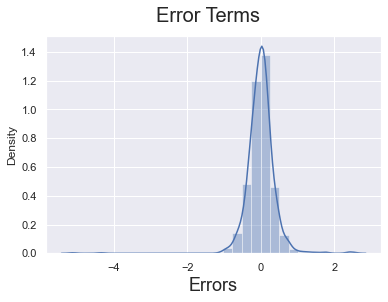

In [161]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train['SalePrice'] - y_train_cnst), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

It follows from the assumption of linear regression that the error terms be normally distributed. Hence the idea of modelling linear regression is on the right track.

In [162]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)


0.84

In [163]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

0            0.0
1            0.0
2            0.0
3            0.0
5            0.0
            ... 
1452         0.0
1455         0.0
1458         0.0
1459         0.0
SalePrice    0.0
Length: 1022, dtype: float64
0.16329545759169264
0.4040983266380754


(1021,) (1021,)


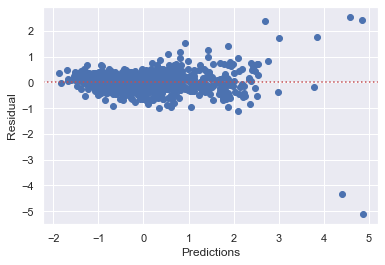

In [164]:
# data['res'] = y_res
y_res = (y_train[y_train.columns[0]] - y_train_cnst)
print(y_train_cnst.shape,y_res.shape)
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

## Prediction and Evalution on Test Data

In [165]:
y_test = df_test.pop('SalePrice')
X_test = df_test
print('SalePrice' in list(X_test.columns))

False


In [166]:
#trained model columns
X_train_rfe.columns

Index(['const', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars', 'Neighborhood_NoRidge', 'HouseStyle_1Story', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_3', 'BsmtQual_5', 'BsmtExposure_4', 'BsmtFinType1_4', 'BsmtFinType1_5', 'BsmtFinType1_6', 'KitchenQual_5', 'GarageType_NA'], dtype='object')

In [167]:
len(X_train_rfe.columns)

19

In [168]:
# Creating X_test_new dataframe by dropping variables from X_test
cols=list(X_train_rfe.columns)
cols=[x for x in cols if x!='const']
X_test_new = X_test[cols]

In [169]:
#Running the Linear Model
X_test_new = sm.add_constant(X_test_new)
print(len(X_test_new.columns))
test_lm = sm.OLS(y_test,X_test_new).fit()
#check summary()
test_lm.summary()

19


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.33e-160
Time:                        10:47:05   Log-Likelihood:                -213.58
No. Observations:                 439   AIC:                             465.2
Df Residuals:                     420   BIC:                             542.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0432      0.020      2.146      0.032       0.004       0.083
OverallQual              0.2133      0.036      5.874      0.000       0.142       0.285
OverallCond              0.1028      0.020      5.100      0.000       0.063       0.142
LowQualFinSF            -0.0292      0.020     -1.467      0.143      -0.068       0.010
GrLivArea                0.4927      0.033     15.116      0.000       0.429       0.557
KitchenAbvGr            -0.0462      0.024     -1.924      0.055      -0.093       0.001
GarageCars               0.1476      0.033      4.451      0.000       0.082       0.213
Neighborhood_NoRidge     0.0641      0.032      2.027      0.043       0.002       0.126
HouseStyle_1Story        0.1169      0.023      5.045      0.000       0.071       0.162
Foundation_CBlock        0.0594      0.032      1.842      0.066      -0.004       0.123
Foundation_PConc         0.1431      0.038      3.802      0.000       0.069       0.217
BsmtQual_3              -0.0215      0.027     -0.798      0.425      -0.074       0.031
BsmtQual_5               0.1440      0.027      5.395      0.000       0.092       0.196
BsmtExposure_4           0.1087      0.023      4.760      0.000       0.064       0.154
BsmtFinType1_4           0.0294      0.024      1.231      0.219      -0.018       0.076
BsmtFinType1_5           0.0431      0.020      2.106      0.036       0.003       0.083
BsmtFinType1_6           0.0844      0.025      3.441      0.001       0.036       0.133
KitchenQual_5            0.1367      0.022      6.169      0.000       0.093       0.180
GarageType_NA            0.0103      0.025      0.403      0.687      -0.040       0.060
==============================================================================
Omnibus:                      116.003   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1068.459
Skew:                           0.843   Prob(JB):                    9.71e-233
Kurtosis:                      10.455   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [171]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.83

In [172]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

75.82478266868921
0.1727216006120483
0.415597883310356


In [173]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10      Foundation_PConc  3.88
9      Foundation_CBlock  2.96
1            OverallQual  2.95
6             GarageCars  2.73
4              GrLivArea  2.36
11            BsmtQual_3  1.89
18         GarageType_NA  1.77
16        BsmtFinType1_6  1.64
12            BsmtQual_5  1.61
17         KitchenQual_5  1.51
8      HouseStyle_1Story  1.31
15        BsmtFinType1_5  1.26
5           KitchenAbvGr  1.25
2            OverallCond  1.24
7   Neighborhood_NoRidge  1.22
14        BsmtFinType1_4  1.22
13        BsmtExposure_4  1.15
3           LowQualFinSF  1.10
0                  const  1.00

Text(0, 0.5, 'y_pred')

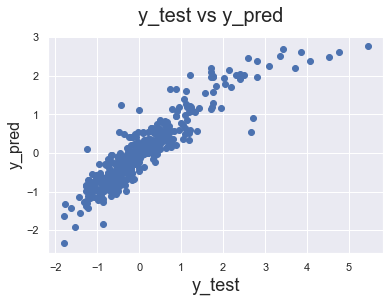

In [174]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Final evalution
No of Variables = 19 i.e. 'const', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars', 'Neighborhood_NoRidge', 'HouseStyle_1Story', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_3', 'BsmtQual_5', 'BsmtExposure_4', 'BsmtFinType1_4', 'BsmtFinType1_5', 'BsmtFinType1_6', 'KitchenQual_5', 'GarageType_NA'
VIF < 5
p-value < 0.05
r2 score for Train Data set model = 0.84
r2 score for Test Data set model = 0.83

In [175]:
y_pred_train = lm.predict(X_train_rfe)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8367045424083074
0.8322731652030195
0            0.0
1            0.0
2            0.0
3            0.0
5            0.0
            ... 
1452         0.0
1455         0.0
1458         0.0
1459         0.0
SalePrice    0.0
Length: 1022, dtype: float64
75.82478266868921
0.16329545759169264
0.1727216006120483


In [176]:
rmse_train = mse_train_lr**0.5
print(rmse_train)
rmse_test = mse_test_lr**0.5
print(rmse_test)

0.4040983266380754
0.415597883310356


In [177]:
r2_score(y_test, y_pred)

0.8322731652030195

the good r2 score tells us that the rfe linear regression is able to describe ~83% of data points which is good and hence we need to apply regularisation to improve the score 

# checking linear regression coefficients

In [178]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,19))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

Variables  Coefficient value
index                                         
4                 GrLivArea       3.785124e-01
1               OverallQual       2.635743e-01
6                GarageCars       1.649010e-01
12               BsmtQual_5       1.343490e-01
7      Neighborhood_NoRidge       1.148396e-01
17            KitchenQual_5       1.088052e-01
8         HouseStyle_1Story       1.082488e-01
10         Foundation_PConc       9.603813e-02
13           BsmtExposure_4       9.023874e-02
16           BsmtFinType1_6       8.694648e-02
9         Foundation_CBlock       7.801753e-02
2               OverallCond       6.889616e-02
18            GarageType_NA       5.218020e-02
14           BsmtFinType1_4       4.510042e-02
15           BsmtFinType1_5       4.416713e-02
0                     const       1.249272e-16
3              LowQualFinSF      -3.625741e-02
11               BsmtQual_3      -4.116182e-02
5              KitchenAbvGr      -7.760421e-02

important features: BsmtExposure_4, Foundation_PConc, BsmtFinType1_6, BsmtFinType1_6, Foundation_CBlock, OverallCond, OverallCond, GarageType_NA.
not satisfying with the r2 score of linear regression going forward with advanced regression ridge and lasso that take into account regularisation to further improve the r2 score

## Ridge Regression

In [179]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)


Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [180]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.25518861556706784


In [181]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0        0.002972      0.001344         0.002053        0.001261      0.0001  {'alpha': 0.0001}          -0.272270          -0.275366          -0.254610          -0.239386          -0.234311        -0.255189        0.016642                1           -0.247612           -0.239622           -0.247653           -0.253174           -0.255308         -0.248674         0.005447
1        0.002062      0.000898         0.002167        0.001478       0.001   {'alpha': 0.001}          -0.272270          -0.275366          -0.254610          -0.239387          -0.234311        -0.255189        0.016642                2           -0.247612           -0.239622           -0.247653           -0.253174           -0.255308         -0.248674         0.005447
2        0.001040      0.000072         0.001539        0.001613        0.01    {'alpha': 0.01}          -0.272270          -0.275367          -0.254609          -0.239387          -0.234310        -0.255189        0.016642                3           -0.247612           -0.239622           -0.247653           -0.253175           -0.255308         -0.248674         0.005447
3        0.003831      0.001937         0.002051        0.000670        0.05    {'alpha': 0.05}          -0.272272          -0.275369          -0.254608          -0.239389          -0.234307        -0.255189        0.016644                4           -0.247613           -0.239622           -0.247653           -0.253176           -0.255309         -0.248675         0.005448
4        0.001974      0.001624         0.001089        0.000553         0.1     {'alpha': 0.1}          -0.272274          -0.275373          -0.254606          -0.239391          -0.234303        -0.255189        0.016646                5           -0.247614           -0.239622           -0.247654           -0.253177           -0.255311         -0.248675         0.005449
5        0.001758      0.001000         0.001065        0.000702         0.2     {'alpha': 0.2}          -0.272278          -0.275379          -0.254601          -0.239395          -0.234295        -0.255190        0.016650                6           -0.247615           -0.239621           -0.247655           -0.253179           -0.255314         -0.248677         0.005450
6        0.001812      0.000789         0.001436        0.000922         0.3     {'alpha': 0.3}          -0.272282          -0.275386          -0.254597          -0.239399          -0.234287        -0.255190        0.016653                7           -0.247617           -0.239621           -0.247656           -0.253181           -0.255317         -0.248678         0.005451
7        0.002605      0.001056         0.000817        0.000084         0.4     {'alpha': 0.4}          -0.272287          -0.275392          -0.254593          -0.239403          -0.234279        -0.255191        0.016657                8           -0.247618           -0.239620           -0.247657           -0.253183           -0.255319         -0.248680         0.005452
8        0.001141      0.000274         0.000765        0.000068         0.5     {'alpha': 0.5}          -0.272291          -0.275399          -0.254589          -0.239407          -0.234271        -0.255191        0.016661                9           -0.247620           -0.239619           -0.247658           -0.253186           -0.255322         -0.248681         0.005453
9        0.001760      0.000968         0.001274        0.000578         0.6     {'alpha': 0.6}          -0.272295          -0.275405          -0.254584          -0.239411          -0.234263        -0.255192        0.016664               10    

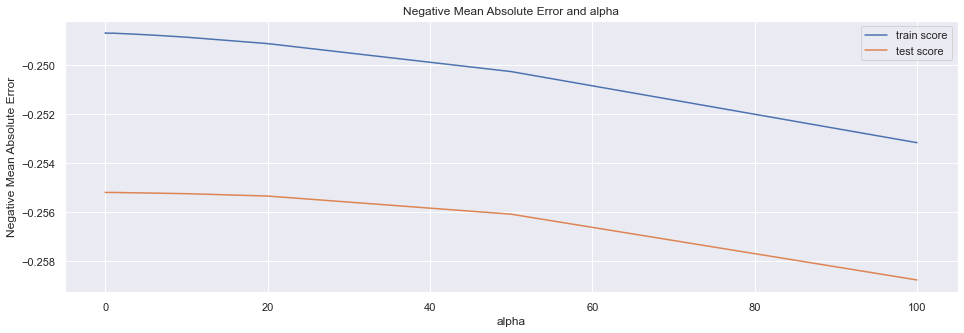

In [182]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [183]:
#final ridge model
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([[ 0.        ,  0.26357434,  0.06889615, -0.0362574 ,  0.37851234,
        -0.0776042 ,  0.16490094,  0.11483959,  0.10824877,  0.07801749,
         0.09603811, -0.04116182,  0.13434903,  0.09023874,  0.04510041,
         0.04416713,  0.08694647,  0.10880524,  0.05218017]])

In [184]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8367045424083042


In [185]:
# Prediction on test set
y_test_pred = ridge.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8322731607642435


## Lasso Regression

In [186]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [187]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [188]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.25510590668625366


In [189]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.001)

In [190]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8366815517496847


In [191]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8323535638388796


In [192]:
mean_squared_error(y_test, y_test_pred)

0.17263880777159682

In [193]:
lasso.coef_

array([ 0.        ,  0.26491339,  0.06680824, -0.03536332,  0.37710585,
       -0.07676171,  0.16297954,  0.11438392,  0.10728223,  0.07385917,
        0.09194955, -0.04017916,  0.13409398,  0.0900734 ,  0.04361174,
        0.04322678,  0.08645726,  0.10848372,  0.04934337])

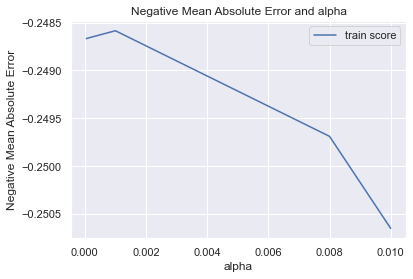

In [194]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

## Getting final coefficients for Ridge

In [195]:
model_cv.best_params_

{'alpha': 0.0001}

In [196]:
ridge = Ridge(alpha = 0.0001)
ridge.fit(X_train_rfe,y_train)

y_pred_train = ridge.predict(X_train_rfe)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test_new)
print(r2_score(y_test,y_pred_test))

0.8367045424083042
0.8322731607642435


In [197]:
model_parameter = list(ridge.coef_[0])
# model_parameter.insert(0,ridge.intercept_)
cols = X_train_rfe.columns
# cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [198]:
X_train_rfe.columns

Index(['const', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars', 'Neighborhood_NoRidge', 'HouseStyle_1Story', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_3', 'BsmtQual_5', 'BsmtExposure_4', 'BsmtFinType1_4', 'BsmtFinType1_5', 'BsmtFinType1_6', 'KitchenQual_5', 'GarageType_NA'], dtype='object')

In [199]:
ridge.coef_

array([[ 0.        ,  0.26357434,  0.06889615, -0.0362574 ,  0.37851234,
        -0.0776042 ,  0.16490094,  0.11483959,  0.10824877,  0.07801749,
         0.09603811, -0.04116182,  0.13434903,  0.09023874,  0.04510041,
         0.04416713,  0.08694647,  0.10880524,  0.05218017]])

In [200]:
len(ridge.coef_[0])

19

In [201]:
ridge_coef

Feaure      Coef
0                  const  0.000000
1            OverallQual  0.263574
2            OverallCond  0.068896
3           LowQualFinSF -0.036257
4              GrLivArea  0.378512
5           KitchenAbvGr -0.077604
6             GarageCars  0.164901
7   Neighborhood_NoRidge  0.114840
8      HouseStyle_1Story  0.108249
9      Foundation_CBlock  0.078017
10      Foundation_PConc  0.096038
11            BsmtQual_3 -0.041162
12            BsmtQual_5  0.134349
13        BsmtExposure_4  0.090239
14        BsmtFinType1_4  0.045100
15        BsmtFinType1_5  0.044167
16        BsmtFinType1_6  0.086946
17         KitchenQual_5  0.108805
18         GarageType_NA  0.052180

In [202]:
ridge_coef.sort_values(by='Coef',ascending=False)

Feaure      Coef
4              GrLivArea  0.378512
1            OverallQual  0.263574
6             GarageCars  0.164901
12            BsmtQual_5  0.134349
7   Neighborhood_NoRidge  0.114840
17         KitchenQual_5  0.108805
8      HouseStyle_1Story  0.108249
10      Foundation_PConc  0.096038
13        BsmtExposure_4  0.090239
16        BsmtFinType1_6  0.086946
9      Foundation_CBlock  0.078017
2            OverallCond  0.068896
18         GarageType_NA  0.052180
14        BsmtFinType1_4  0.045100
15        BsmtFinType1_5  0.044167
0                  const  0.000000
3           LowQualFinSF -0.036257
11            BsmtQual_3 -0.041162
5           KitchenAbvGr -0.077604

## Getting final coefficients for Lasso

In [203]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.25510590668625366


In [204]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8885357943016787
0.8595570736810942


In [205]:
model_parameter = list(lasso.coef_)
# model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
# cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']

In [206]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'FireplaceQu_5', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=171)

In [207]:
len(X_train.columns)

171

In [208]:
lasso.coef_

array([-3.99056714e-02,  5.76273763e-02,  1.62522109e-01,  6.60227551e-02,
        2.29527282e-02,  2.58976286e-02, -0.00000000e+00,  1.62476927e-04,
        2.54300258e-02,  5.61537346e-03,  0.00000000e+00,  1.47912697e-01,
       -1.32393840e-02,  2.51238590e-01,  5.91737254e-02,  1.33447627e-02,
        5.56662091e-02,  1.42086674e-02, -1.18734408e-02, -4.29120540e-02,
        2.01866907e-02,  2.34655232e-02, -0.00000000e+00,  1.21451343e-01,
       -1.43065408e-02,  1.74823777e-02, -1.03848657e-02,  5.45374131e-04,
        1.54012575e-02,  1.64148893e-02, -7.24110770e-03, -0.00000000e+00,
       -9.53298233e-04, -4.64095445e-02, -7.75328410e-03, -0.00000000e+00,
       -9.08315865e-03,  2.01515406e-02, -9.24935516e-04,  3.55436831e-04,
        2.70029524e-02,  6.68069798e-03,  0.00000000e+00, -2.10911172e-02,
       -8.17131290e-02, -5.79249292e-02, -1.84625783e-02, -1.38297575e-02,
        1.61181432e-03,  1.19078787e-02,  2.93802122e-02,  1.44538702e-02,
        0.00000000e+00, -

In [209]:
len(lasso.coef_)

171

In [210]:
lasso_coef

Feaure          Coef
0          LotFrontage -3.990567e-02
1              LotArea  5.762738e-02
2          OverallQual  1.625221e-01
3          OverallCond  6.602276e-02
4         YearRemodAdd  2.295273e-02
..                 ...           ...
166  GarageType_Detchd  0.000000e+00
167      GarageType_NA  2.309177e-02
168    GarageFinish_NA  3.845438e-15
169   GarageFinish_RFn -2.789741e-02
170   GarageFinish_Unf -3.723336e-02

[171 rows x 2 columns]

In [211]:
lasso_coef.sort_values(by='Coef',ascending=False).head(25)

Feaure      Coef
13              GrLivArea  0.251239
2             OverallQual  0.162522
11               2ndFlrSF  0.147913
84      HouseStyle_1Story  0.147000
73   Neighborhood_NoRidge  0.135977
23             GarageCars  0.121451
74   Neighborhood_NridgHt  0.121207
139            BsmtQual_5  0.117538
79   Neighborhood_Somerst  0.095601
143        BsmtExposure_4  0.095090
156         KitchenQual_5  0.083319
64   Neighborhood_Crawfor  0.066293
3             OverallCond  0.066023
14           BsmtFullBath  0.059174
1                 LotArea  0.057627
16               FullBath  0.055666
80   Neighborhood_StoneBr  0.054626
97    Exterior1st_BrkFace  0.041518
115   Exterior2nd_ImStucc  0.037766
131     Foundation_CBlock  0.035609
149        BsmtFinType1_6  0.034146
142        BsmtExposure_3  0.031086
50            MSZoning_RL  0.029380
83      HouseStyle_1.5Unf  0.027451
40          MSSubClass_75  0.027003

In [212]:
lasso_coef.sort_values(by='Coef',ascending=False).tail(25)

Feaure      Coef
24             GarageArea -0.014307
77    Neighborhood_Sawyer -0.014866
164    GarageType_BuiltIn -0.015263
46         MSSubClass_180 -0.018463
101   Exterior1st_ImStucc -0.019800
43          MSSubClass_90 -0.021091
70     Neighborhood_NAmes -0.022547
86      HouseStyle_2.5Unf -0.025011
144        BsmtFinType1_1 -0.025553
120    Exterior2nd_Stucco -0.027422
169      GarageFinish_RFn -0.027897
69   Neighborhood_Mitchel -0.027991
53           LotShape_IR3 -0.028795
123   Exterior2nd_Wd Shng -0.029165
75   Neighborhood_OldTown -0.029558
56          LotConfig_FR2 -0.032275
85      HouseStyle_2.5Fin -0.032795
170      GarageFinish_Unf -0.037233
0             LotFrontage -0.039906
19           KitchenAbvGr -0.042912
33               HouseAge -0.046410
87      HouseStyle_2Story -0.047460
65   Neighborhood_Edwards -0.057519
45         MSSubClass_160 -0.057925
44         MSSubClass_120 -0.081713

Best alpha value for Lasso : {'alpha': 0.0001}
Best alpha value for Ridge : {'alpha': 0.001}

Hence we see that with both lasso and Ridge regression we are able to get test and train score. We can use either for the final model and would be going ahead with the Lasso mode

The best top features that help in price prediction upto ~85% of accuracy are:
GrLivArea, OverallQual, GarageCars, BsmtQual_5, Neighborhood_NoRidge, KitchenQual_5, HouseStyle_1Story,Foundation_PConc, BsmtExposure_4, BsmtFinType1_6 whose respective best coefficients are tabulated in above to above cell. 